In [4]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA, TruncatedSVD


Mounted at /content/drive


In [ ]:
# загрузка данных с разделением по символу ";"
file_path = '/content/drive/MyDrive/!03&04_17_VSE.csv'
data = pd.read_csv(file_path, sep=';', encoding='windows-1251')

In [ ]:
# информация о данных
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691539 entries, 0 to 691538
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Дата                      691539 non-null  object
 1   ДатаДоставки              690913 non-null  object
 2   НомерЗаказаНаСайте        691535 non-null  object
 3   НовыйСтатус               691539 non-null  object
 4   СуммаЗаказаНаСайте        691539 non-null  object
 5   СуммаДокумента            691539 non-null  object
 6   МетодДоставки             691539 non-null  object
 7   ФормаОплаты               691539 non-null  object
 8   Регион                    686397 non-null  object
 9   Группа2                   616853 non-null  object
 10  Группа3                   616853 non-null  object
 11  Группа4                   585914 non-null  object
 12  Тип                       691539 non-null  object
 13  Номенклатура              691539 non-null  object
 14  ТипТ

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа
0,01.03.2017 11:41,07.03.2017 0:00,3998972_TR,Частичный возврат,12 098,12 247,Курьерская,Наличная,Москва,КРУПНОГАБАРИТНЫЙ ТОВАР,КОЛЯСКИ,АКСЕССУАРЫ ДЛЯ КОЛЯСОК,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",КГТ,Нет,NaN,1,680,680,172,3,2 017,NaN,Возврат,Москва,508,0,0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,NaN
1,01.03.2017 12:22,15.03.2017 0:00,3999117_TR,Доставлен,4 819,3 759,Магазины,Безналичная,Челябинск,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",МГТ,Нет,NaN,1,379,379,"209,8",3,2 017,23111,Доставлен,Регионы,"169,2",0,0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,NaN
2,01.03.2017 12:31,17.03.2017 0:00,3999122_TR,Доставлен,3 325,3 325,Магазины,Безналичная,Нижневартовск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",МГТ,Нет,NaN,1,3 325,3 325,1 149,3,2 017,23111,Доставлен,Регионы,2 176,0,0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,NaN
3,01.03.2017 3:06,02.03.2017 0:00,3999363_TR,К отгрузке,4 998,4 998,Курьерская,Наличная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",МГТ,Нет,NaN,1,330,330,"166,96",3,2 017,NaN,Доставлен,Москва,"163,04",0,0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,NaN
4,01.03.2017 11:38,14.03.2017 0:00,3999411_TR,Доставлен,528,528,Магазины,Безналичная,Ижевск,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",МГТ,Нет,NaN,1,199,199,79,3,2 017,23111,Доставлен,Регионы,120,0,0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,NaN


In [ ]:
# создаем таблицу с информацией о данных
unique_values = data.nunique()  # кол-во уникальных значений
null_values = data.isnull().sum()  # кол-во пропущенных значений
zero_values = (data == 0).sum()  # кол-во нулевых значений (для числовых столбцов)

# доля пропущенных значений (в процентах)
null_percentage = (data.isnull().sum() / len(data)) * 100

# типы данных каждого столбца
data_types = data.dtypes

# собираем все в одну таблицу
summary_df = pd.DataFrame({
    'Уникальные значения': unique_values,
    'Нулевые значения': zero_values,
    'Пропуски (NaN)': null_values,
    '% пропусков': null_percentage.round(2),
    'Тип данных': data_types
})

# сортируем по убыванию пропусков
summary_df = summary_df.sort_values(by='Пропуски (NaN)', ascending=False)

# выводим таблицу
display(summary_df.style.background_gradient(cmap='Blues', subset=['% пропусков']))

,Уникальные значения,Нулевые значения,Пропуски (NaN),% пропусков,Тип данных
МагазинЗаказа,89,0,686556,99.280000,object
ПричинаОтмены,31,0,624836,90.350000,object
ПВЗ_код,4,0,228886,33.100000,object
Группа4,411,0,105625,15.270000,object
Маржа,43917,0,76913,11.120000,object
ЦенаЗакупки,24782,0,76913,11.120000,object
ТипТовара,2,0,74690,10.800000,object
Группа3,93,0,74686,10.800000,object
Группа2,13,0,74686,10.800000,object
ЭлектроннаяПочта_new,6176,0,13117,1.900000,object


In [ ]:
# преобразование количественных типов данных

int_cols = [
    'Количество',
    'НомерСтроки',
    'КоличествоПроданоКлиенту'
]
for col in int_cols:
    data[col] = data[col].astype(int)

In [ ]:
# преобразование типов данных в float

money_cols = [
    'СуммаЗаказаНаСайте',
    'СуммаДокумента',
    'Цена',
    'СуммаСтроки',
    'ЦенаЗакупки',
    'Маржа',
    'СуммаУслуг',
    'СуммаДоставки'
]
for col in money_cols:
    # удаляем пробелы, заменяем запятые на точки, преобразуем в float
    data[col] = (
        data[col]
        .astype(str)
        .str.replace(' ', '')
        .str.replace(',', '.')
        .astype(float)
    )

In [ ]:
# удаление столбцов с большим количеством пропусков

data.drop(columns=['МагазинЗаказа'], inplace=True)

In [ ]:
# преобразуем формат к нижнему регистру для всех категориальных колонок
cat_cols = ['Группа2', 'Группа3', 'Группа4', 'ТипТовара']
for col in cat_cols:
    if col in data.columns:
        data[col] = data[col].str.lower()
        data[col] = data[col].str.strip()

Заполнение пропусков

In [ ]:
print(data['ТипТовара'].value_counts())

ТипТовара
мгт    575970
кгт     40879
Name: count, dtype: int64


1. Анализ причин отмены

In [ ]:
# уникальные значения в столбце 'Отменено'
print("Уникальные значения в столбце 'Отменено':")
print(data['Отменено'].unique())

print("\nРаспределение значений в столбце 'Отменено':")
print(data['Отменено'].value_counts())

Уникальные значения в столбце 'Отменено':
['Нет' 'Да']

Распределение значений в столбце 'Отменено':
Отменено
Нет    623964
Да      67575
Name: count, dtype: int64


In [ ]:
print("\n--- 3. Анализ отмен ---")

sample_data = data[data['Дата'].str.startswith("01.03.2017")]

total_rows = len(sample_data)
cancelled_rows_df = sample_data[sample_data['Отменено'].str.lower() == 'да']
num_cancelled = len(cancelled_rows_df)
cancellation_rate = (num_cancelled / total_rows) * 100 if total_rows > 0 else 0

print(f"Общее количество строк в сэмпле: {total_rows}")
print(f"Количество отмененных строк: {num_cancelled}")
print(f"Доля отмены: {cancellation_rate:.2f}%")

if num_cancelled > 0:
    print("\nАнализ причин отмены (ТОП 10):")
    reasons = cancelled_rows_df['ПричинаОтмены'].value_counts().head(10)
    print(reasons)

print("\nРаспределение отмен по группам:")
for group_col in ['Группа2', 'Группа3']:
    group_cancel = cancelled_rows_df[group_col].value_counts()
    print(f"\nОтмены по {group_col} (ТОП 10):")
    print(group_cancel.head(10))



--- 3. Анализ отмен ---
Общее количество строк в сэмпле: 11784
Количество отмененных строк: 1264
Доля отмены: 10.73%

Анализ причин отмены (ТОП 10):
ПричинаОтмены
Авто корректировка склада                                   334
1.5 Письмо об отмене                                        299
1.4 Ошибка выбора, будет новый заказ                        124
4.01 Нет на остатках или нет в обработке ЗПЗ                107
5.3 Другое                                                   80
4.04 Не пришел товар от поставщика                           73
2.1 Не устроила дата доставки                                68
5.1 Уже купил товар в другом месте                           23
1.3 Не верные контактные данные или нет связи с клиентом     22
Возврат товара                                               22
Name: count, dtype: int64

Распределение отмен по группам:

Отмены по Группа2 (ТОП 10):
Группа2
игрушки                     319
текстиль, трикотаж          253
детское питание             185
круп

In [ ]:
# группируем только по подходящим нам данным
filtered_data = sample_data[
    (sample_data['Тип'] != 'Услуги') &
    (sample_data['КоличествоПроданоКлиенту'] > 0) &
    (~sample_data['МетодДоставки'].str.lower().str.contains('доставка', na=False))
]


In [ ]:
# распределение статусов

print("\nУникальные статусы среди строк с продажами > 0:")
print(filtered_data['Статус'].value_counts())



Уникальные статусы среди строк с продажами > 0:
Статус
Доставлен       7538
Отменен          851
Возврат          785
В процессе       111
Не определен      23
Name: count, dtype: int64


In [ ]:
# распределение статусов

filtered_data['НовыйСтатус'].value_counts()


,count
НовыйСтатус,
К отгрузке,4031
Доставлен,3507
Отменен,797
Возврат из ПВЗ,519
Частичный возврат,263
Принят в ПВЗ,71
Расформирован ПВЗ,54
Скомплектован Регион,36
Отменяется,23


In [ ]:
# определение успешных товаров
good_sales = filtered_data[filtered_data['НовыйСтатус'] == 'Доставлен']


In [ ]:
# успешные категории

good_sales['Группа2'].value_counts().head(10)

,count
Группа2,
игрушки,716
"текстиль, трикотаж",559
подгузники,282
детское питание,277
крупногабаритный товар,266
"канцтовары, книги, диски",219
косметика/гигиена,212
обувь,185
товары для кормления,168


In [ ]:
# успешные категории
good_sales['Группа3'].value_counts().head(10)


,count
Группа3,
подгузники,256
одежда для новорожденных (0-2 лет),185
игрушки для развития малышей,177
обувь детская,176
пюре,136
канцтовары,125
конструкторы,117
творчество,113
верхняя детская одежда,102


In [ ]:
for col in ['СуммаСтроки', 'СуммаДокумента', 'Цена', 'ЦенаЗакупки']:
    data[col] = data[col].astype(str).str.replace(' ', '').str.replace(',', '.').astype(float)


In [ ]:
good_sales = data[data['КоличествоПроданоКлиенту'] > 0]

top_items = good_sales.groupby('Номенклатура').agg({
    'СуммаСтроки': 'sum',
    'КоличествоПроданоКлиенту': 'sum',
    'ID_SKU': 'count'
}).sort_values(by='СуммаСтроки', ascending=False)

top_items.head(10)


,СуммаСтроки,КоличествоПроданоКлиенту,ID_SKU
Номенклатура,,,
Доставка,8939712.00,71871,71692
"МУНИ, ПОДГУЗНИКИ (L), (9-14кг) (54шт)",3325426.00,3055,2079
"МУНИ, ПОДГУЗНИКИ (М), (6-11кг) (62шт)",3044046.00,2760,2015
"МЕРРИЕС, ТРУСИКИ, Walker (L), (9-14 кг) (42/44 шт)",2824336.15,2344,1391
"ФРИСОПЕП АС, ЗАМЕНИТЕЛЬ молока, с нуклеотидами, с рожд., (400 г)",2541995.00,2964,757
"MOONY, ТРУСИКИ для мал., (9-14 кг), (44 шт)",2032226.00,1852,1244
"MOONY, ТРУСИКИ для дев., (9-14 кг), (44 шт)",1971672.00,1822,1275
"MOONY, ТРУСИКИ для мал., (12-17 кг), (38 шт)",1860050.00,1670,993
"МУНИ, ПОДГУЗНИКИ (S), (4-8кг) (81шт)",1845413.00,1695,1283


In [ ]:
for group in ['Группа2', 'Группа3']:
    print(f"\nРаспределение по {group}:")
    print(filtered_data[group].value_counts().head(10))



Распределение по Группа2:
Группа2
детское питание             1921
игрушки                     1619
текстиль, трикотаж          1464
подгузники                   758
косметика/гигиена            663
крупногабаритный товар       503
обувь                        467
товары для кормления         410
канцтовары, книги, диски     380
товары для животных          167
Name: count, dtype: int64

Распределение по Группа3:
Группа3
пюре                                  1025
подгузники                             689
обувь детская                          441
одежда для новорожденных (0-2 лет)     430
игрушки для развития малышей           398
каши                                   355
детская одежда (2-6 лет)               273
конструкторы                           253
заменители молока                      247
верхняя детская одежда                 246
Name: count, dtype: int64


In [ ]:
# создаём флаг «выкуплен»: 1, если НовыйСтатус в ['Доставлен']
statuses_purchased = ['Доставлен']
data['Флаг_Выкуплен'] = data['НовыйСтатус'].isin(statuses_purchased).astype(int)

# фильтруем по флагу:
sales = data[data['Флаг_Выкуплен'] == 1].copy()

monthly_summary = sales.groupby('МесяцДатыЗаказа').agg({
    'СуммаДокумента': 'sum',
    'ЦенаЗакупки': 'sum',
    'Маржа': 'sum',
    'ID_SKU': 'count',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'Телефон_new': pd.Series.nunique
}).rename(columns={
    'СуммаДокумента': 'Выручка',
    'ЦенаЗакупки': 'Себестоимость',
    'Маржа': 'Маржа',
    'ID_SKU': 'Всего товаров',
    'НомерЗаказаНаСайте': 'Уникальные чеки',
    'Телефон_new': 'Уникальные клиенты'
}).reset_index()

# «Средний чек» и «Средняя маржа с товара»
monthly_summary['Средний чек'] = (monthly_summary['Выручка'] / monthly_summary['Уникальные чеки']).round(2)
monthly_summary['Средняя маржа с товара'] = (monthly_summary['Маржа'] / monthly_summary['Всего товаров']).round(2)

# «Итого»
total_row = monthly_summary.drop(columns='МесяцДатыЗаказа').sum(numeric_only=True)
total_row['МесяцДатыЗаказа'] = 'За весь период'
monthly_summary = pd.concat([monthly_summary, pd.DataFrame([total_row])], ignore_index=True)

monthly_summary.rename(columns={'МесяцДатыЗаказа': 'Месяц'}, inplace=True)

# экспорт в Excel
output_path = "выручка_delivered.xlsx"

with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    monthly_summary.to_excel(writer, sheet_name='Выручка', index=False)

print(f"Файл сохранён: {output_path}")

Файл сохранён: выручка_delivered.xlsx


In [ ]:
# делаем то же самое, только со всем срезом данных
all_sales = data.copy()

monthly_summary = all_sales.groupby('МесяцДатыЗаказа').agg({
    'СуммаДокумента': 'sum',
    'ЦенаЗакупки': 'sum',
    'Маржа': 'sum',
    'ID_SKU': 'count',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'Телефон_new': pd.Series.nunique
}).rename(columns={
    'СуммаДокумента': 'Выручка',
    'ЦенаЗакупки': 'Себестоимость',
    'Маржа': 'Маржа',
    'ID_SKU': 'Всего товаров',
    'НомерЗаказаНаСайте': 'Уникальные чеки',
    'Телефон_new': 'Уникальные клиенты'
}).reset_index()

monthly_summary['Средний чек'] = (monthly_summary['Выручка'] / monthly_summary['Уникальные чеки']).round(2)
monthly_summary['Средняя маржа с товара'] = (monthly_summary['Маржа'] / monthly_summary['Всего товаров']).round(2)

total_row = monthly_summary.drop(columns='МесяцДатыЗаказа').sum(numeric_only=True)
total_row['МесяцДатыЗаказа'] = 'За весь период'
monthly_summary = pd.concat([monthly_summary, pd.DataFrame([total_row])], ignore_index=True)

monthly_summary.rename(columns={'МесяцДатыЗаказа': 'Месяц'}, inplace=True)

output_path = 'выручка_total.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    monthly_summary.to_excel(writer, sheet_name='Выручка_все_товары', index=False)

print(f"Файл сохранён: {output_path}")

Файл сохранён: выручка_total.xlsx


In [ ]:
# создаем табличку "Темп роста" (тут сначала делаем про выкупленным товарам)
data['МесяцДатыЗаказа'] = data['МесяцДатыЗаказа'].replace({
    3: 'март',
    4: 'апрель'
})

sales_purchased = data[data['Флаг_Выкуплен'] == 1].copy()

summary_purchased = sales_purchased.groupby('МесяцДатыЗаказа').agg({
    'СуммаДокумента': 'sum',
    'Маржа': 'sum'
}).rename(columns={
    'СуммаДокумента': 'Выручка',
    'Маржа': 'Маржа'
}).reset_index()

total_row = pd.DataFrame([{
    'МесяцДатыЗаказа': 'Total',
    'Выручка': summary_purchased['Выручка'].sum(),
    'Маржа': summary_purchased['Маржа'].sum()
}])

summary_purchased = pd.concat([summary_purchased, total_row], ignore_index=True)
summary_purchased.rename(columns={'МесяцДатыЗаказа': 'Месяц'}, inplace=True)

output_path = 'темп роста_delivered.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    summary_purchased.to_excel(writer, sheet_name='Выручка_Выкупленные', index=False)

print(f"Файл сохранён: {output_path}")

Файл сохранён: темп роста_delivered.xlsx


In [ ]:
# теперь повторяем по всему срезу
data['МесяцДатыЗаказа'] = data['МесяцДатыЗаказа'].replace({
    3: 'март',
    4: 'апрель'
})

all_sales = data.copy()

summary_all = all_sales.groupby('МесяцДатыЗаказа').agg({
    'СуммаДокумента': 'sum',
    'Маржа': 'sum'
}).rename(columns={
    'СуммаДокумента': 'Выручка',
    'Маржа': 'Маржа'
}).reset_index()

total_row = pd.DataFrame([{
    'МесяцДатыЗаказа': 'Total',
    'Выручка': summary_all['Выручка'].sum(),
    'Маржа': summary_all['Маржа'].sum()
}])

summary_all = pd.concat([summary_all, total_row], ignore_index=True)
summary_all.rename(columns={'МесяцДатыЗаказа': 'Месяц'}, inplace=True)

output_path = 'темп роста_total.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    summary_all.to_excel(writer, sheet_name='Выручка_ВсеТовары', index=False)

print(f"Файл сохранён: {output_path}")

Файл сохранён: темп роста_total.xlsx


In [ ]:
# создаем табличку с информацией по категориям товаров
# выбираем уникальные комбинации иерархии
category_hierarchy = data[['Группа2', 'Группа3', 'Группа4']].drop_duplicates()
category_hierarchy.columns = ['lvl1', 'lvl2', 'lvl3']
category_hierarchy = category_hierarchy.sort_values(by=['lvl1', 'lvl2', 'lvl3']).reset_index(drop=True)

metrics = (
    data
    .groupby(['Группа2', 'Группа3', 'Группа4'])
    .agg(
        Количество_проданных_товаров=('ID_SKU', 'count'),
        Средняя_выручка=('СуммаДокумента', 'mean'),
        Количество_товаров_по_категории=('ID_SKU', 'nunique'),
        Количество_клиентов=('Телефон_new', 'nunique'),
        Средняя_маржа=('Маржа', 'mean')
    )
    .reset_index()
    .rename(columns={
        'Группа2': 'lvl1',
        'Группа3': 'lvl2',
        'Группа4': 'lvl3'
    })
)

# объединяем иерархию с рассчитанными метриками
category_stats = pd.merge(
    category_hierarchy,
    metrics,
    on=['lvl1', 'lvl2', 'lvl3'],
    how='left'
)

category_stats['Средняя_выручка'] = category_stats['Средняя_выручка'].round(2)
category_stats['Средняя_маржа'] = category_stats['Средняя_маржа'].round(2)

category_stats.to_excel("категории.xlsx", index=False)
print("Файл сохранён: категории_с_метриками.xlsx")

Файл сохранён: категории_с_метриками.xlsx


In [ ]:
# для следующего шага извлечем из даты дни недели
data['Дата'] = pd.to_datetime(data['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')

data['день недели'] = data['Дата'].dt.day_name()

days_map = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}
data['день недели'] = data['день недели'].map(days_map)

# и также извлечем часы из времени
data['время'] = data['Дата'].dt.hour

print(data[['Дата', 'день недели', 'время']].head())

                 Дата день недели  время
0 2017-03-01 11:41:00       Среда     11
1 2017-03-01 12:22:00       Среда     12
2 2017-03-01 12:31:00       Среда     12
3 2017-03-01 03:06:00       Среда      3
4 2017-03-01 11:38:00       Среда     11


In [ ]:
# теперь посмотрим на выручку по дням и часам (сначала посмотрим по выкупленным товарам)
sales_purchased = data[data['Флаг_Выкуплен'] == 1].copy()

week_summary_purchased = sales_purchased.groupby('день недели').agg({
    'СуммаДокумента': 'sum',
    'ЦенаЗакупки': 'sum',
    'Маржа': 'sum',
    'ID_SKU': 'count',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'Телефон_new': pd.Series.nunique
}).rename(columns={
    'СуммаДокумента': 'Выручка',
    'ЦенаЗакупки': 'Себестоимость',
    'Маржа': 'Маржа',
    'ID_SKU': 'Всего товаров',
    'НомерЗаказаНаСайте': 'Уникальные чеки',
    'Телефон_new': 'Уникальные клиенты'
}).reset_index()

week_summary_purchased['Средний чек'] = (
    week_summary_purchased['Выручка'] / week_summary_purchased['Уникальные чеки']
).round(2)
week_summary_purchased['Средняя маржа с товара'] = (
    week_summary_purchased['Маржа'] / week_summary_purchased['Всего товаров']
).round(2)

days_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
week_summary_purchased['день недели'] = pd.Categorical(
    week_summary_purchased['день недели'],
    categories=days_order,
    ordered=True
)
week_summary_purchased = week_summary_purchased.sort_values('день недели')

hour_summary_purchased = sales_purchased.groupby('время').agg({
    'СуммаДокумента': 'sum',
    'ЦенаЗакупки': 'sum',
    'Маржа': 'sum',
    'ID_SKU': 'count',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'Телефон_new': pd.Series.nunique
}).rename(columns={
    'СуммаДокумента': 'Выручка',
    'ЦенаЗакупки': 'Себестоимость',
    'Маржа': 'Маржа',
    'ID_SKU': 'Всего товаров',
    'НомерЗаказаНаСайте': 'Уникальные чеки',
    'Телефон_new': 'Уникальные клиенты'
}).reset_index()

hour_summary_purchased['Средний чек'] = (
    hour_summary_purchased['Выручка'] / hour_summary_purchased['Уникальные чеки']
).round(2)
hour_summary_purchased['Средняя маржа с товара'] = (
    hour_summary_purchased['Маржа'] / hour_summary_purchased['Всего товаров']
).round(2)

output_purchased = "выручка по дням_delivered.xlsx"
with pd.ExcelWriter(output_purchased, engine='openpyxl') as writer:
    week_summary_purchased.to_excel(writer, sheet_name='По дням недели', index=False)
    hour_summary_purchased.to_excel(writer, sheet_name='По часам', index=False)

print(f"Файл сохранён: {output_purchased}")

Файл сохранён: выручка по дням_delivered.xlsx


In [ ]:
# повторим для всего среза данных
all_sales = data.copy()

week_summary_all = all_sales.groupby('день недели').agg({
    'СуммаДокумента': 'sum',
    'ЦенаЗакупки': 'sum',
    'Маржа': 'sum',
    'ID_SKU': 'count',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'Телефон_new': pd.Series.nunique
}).rename(columns={
    'СуммаДокумента': 'Выручка',
    'ЦенаЗакупки': 'Себестоимость',
    'Маржа': 'Маржа',
    'ID_SKU': 'Всего товаров',
    'НомерЗаказаНаСайте': 'Уникальные чеки',
    'Телефон_new': 'Уникальные клиенты'
}).reset_index()

week_summary_all['Средний чек'] = (
    week_summary_all['Выручка'] / week_summary_all['Уникальные чеки']
).round(2)
week_summary_all['Средняя маржа с товара'] = (
    week_summary_all['Маржа'] / week_summary_all['Всего товаров']
).round(2)

days_order = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
week_summary_all['день недели'] = pd.Categorical(
    week_summary_all['день недели'],
    categories=days_order,
    ordered=True
)
week_summary_all = week_summary_all.sort_values('день недели')

hour_summary_all = all_sales.groupby('время').agg({
    'СуммаДокумента': 'sum',
    'ЦенаЗакупки': 'sum',
    'Маржа': 'sum',
    'ID_SKU': 'count',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'Телефон_new': pd.Series.nunique
}).rename(columns={
    'СуммаДокумента': 'Выручка',
    'ЦенаЗакупки': 'Себестоимость',
    'Маржа': 'Маржа',
    'ID_SKU': 'Всего товаров',
    'НомерЗаказаНаСайте': 'Уникальные чеки',
    'Телефон_new': 'Уникальные клиенты'
}).reset_index()

hour_summary_all['Средний чек'] = (
    hour_summary_all['Выручка'] / hour_summary_all['Уникальные чеки']
).round(2)
hour_summary_all['Средняя маржа с товара'] = (
    hour_summary_all['Маржа'] / hour_summary_all['Всего товаров']
).round(2)

output_all = "выручка по дням_total.xlsx"
with pd.ExcelWriter(output_all, engine='openpyxl') as writer:
    week_summary_all.to_excel(writer, sheet_name='По дням недели', index=False)
    hour_summary_all.to_excel(writer, sheet_name='По часам', index=False)

print(f"Файл сохранён: {output_all}")

Файл сохранён: выручка по дням_total.xlsx


In [ ]:
# изучим динамику по категориям, сначала смотрим по выкупленным товарам
def build_aggregate(data, group_col, label='Общий итог'):
    grouped = data.groupby(group_col).agg({
        'СуммаДокумента': 'sum',
        'ЦенаЗакупки': 'sum',
        'Маржа': 'sum',
        'ID_SKU': 'count',
        'НомерЗаказаНаСайте': pd.Series.nunique
    }).rename(columns={
        'СуммаДокумента': 'Доход',
        'ЦенаЗакупки': 'Затраты',
        'Маржа': 'Маржа',
        'ID_SKU': 'Кол-во товаров',
        'НомерЗаказаНаСайте': 'Кол-во чеков'
    }).reset_index()

    grouped['Средняя маржа'] = (grouped['Маржа'] / grouped['Кол-во товаров']).round(2)
    grouped['Средний чек'] = (grouped['Доход'] / grouped['Кол-во чеков']).round(2)
    grouped['Среднее кол-во товаров в чеке'] = (grouped['Кол-во товаров'] / grouped['Кол-во чеков']).round(6)

    total = grouped.drop(columns=group_col).sum(numeric_only=True)
    total[group_col] = label
    grouped = pd.concat([grouped, pd.DataFrame([total])], ignore_index=True)

    return grouped

sales_purchased = data[data['Флаг_Выкуплен'] == 1].copy()

agg_by_type_purchased = build_aggregate(sales_purchased, 'Тип')
agg_by_product_type_purchased = build_aggregate(sales_purchased, 'ТипТовара')
agg_by_group2_purchased = build_aggregate(sales_purchased, 'Группа2')
agg_by_group3_purchased = build_aggregate(sales_purchased, 'Группа3')

with pd.ExcelWriter("динамика по категориям_delivered.xlsx", engine='openpyxl') as writer:
    agg_by_type_purchased.to_excel(writer, sheet_name='По типу', index=False)
    agg_by_product_type_purchased.to_excel(writer, sheet_name='По типу товара', index=False)
    agg_by_group2_purchased.to_excel(writer, sheet_name='По Группа2', index=False)
    agg_by_group3_purchased.to_excel(writer, sheet_name='По Группа3', index=False)

print("Файл сохранён: динамика по категориям_delivered.xlsx")


# а теперь по всему срезу
def build_aggregate(data, group_col, label='Общий итог'):
    grouped = data.groupby(group_col).agg({
        'СуммаДокумента': 'sum',
        'ЦенаЗакупки': 'sum',
        'Маржа': 'sum',
        'ID_SKU': 'count',
        'НомерЗаказаНаСайте': pd.Series.nunique
    }).rename(columns={
        'СуммаДокумента': 'Доход',
        'ЦенаЗакупки': 'Затраты',
        'Маржа': 'Маржа',
        'ID_SKU': 'Кол-во товаров',
        'НомерЗаказаНаСайте': 'Кол-во чеков'
    }).reset_index()

    grouped['Средняя маржа'] = (grouped['Маржа'] / grouped['Кол-во товаров']).round(2)
    grouped['Средний чек'] = (grouped['Доход'] / grouped['Кол-во чеков']).round(2)
    grouped['Среднее кол-во товаров в чеке'] = (grouped['Кол-во товаров'] / grouped['Кол-во чеков']).round(6)

    total = grouped.drop(columns=group_col).sum(numeric_only=True)
    total[group_col] = label
    grouped = pd.concat([grouped, pd.DataFrame([total])], ignore_index=True)

    return grouped

all_sales = data.copy()

agg_by_type_all = build_aggregate(all_sales, 'Тип')
agg_by_product_type_all = build_aggregate(all_sales, 'ТипТовара')
agg_by_group2_all = build_aggregate(all_sales, 'Группа2')
agg_by_group3_all = build_aggregate(all_sales, 'Группа3')

with pd.ExcelWriter("динамика по категориям_total.xlsx", engine='openpyxl') as writer:
    agg_by_type_all.to_excel(writer, sheet_name='По типу', index=False)
    agg_by_product_type_all.to_excel(writer, sheet_name='По типу товара', index=False)
    agg_by_group2_all.to_excel(writer, sheet_name='По Группа2', index=False)
    agg_by_group3_all.to_excel(writer, sheet_name='По Группа3', index=False)

print("Файл сохранён: динамика по категориям_total.xlsx")

Файл сохранён: динамика по категориям_delivered.xlsx
Файл сохранён: динамика по категориям_total.xlsx


In [ ]:
# последним этапом посмотрим на инфо по клиентам
# пройдемся по выкупленным товарам
sales_purchased = data[data['Флаг_Выкуплен'] == 1].copy()

client_summary_purchased = sales_purchased.groupby('ЭлектроннаяПочта_new').agg({
    'ID_SKU': 'count',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'СуммаДокумента': 'sum'
}).rename(columns={
    'ID_SKU': 'Всего товаров',
    'НомерЗаказаНаСайте': 'Кол-во чеков',
    'СуммаДокумента': 'Выручка'
}).reset_index()

client_summary_purchased['среднее количество товаров в чеке'] = (
    client_summary_purchased['Всего товаров'] / client_summary_purchased['Кол-во чеков']
).round(2)
client_summary_purchased['средний чек'] = (
    client_summary_purchased['Выручка'] / client_summary_purchased['Кол-во чеков']
).round(2)

client_summary_purchased = client_summary_purchased[[
    'ЭлектроннаяПочта_new',
    'среднее количество товаров в чеке',
    'средний чек'
]]
client_summary_purchased.rename(columns={'ЭлектроннаяПочта_new': 'id клиента'}, inplace=True)

client_summary_purchased.to_excel("инфо по клиентам_delivered.xlsx", sheet_name='По клиентам', index=False)
print("Файл сохранён: инфо по клиентам_delivered.xlsx")

# и также по всему срезу данных
all_sales = data.copy()

client_summary_all = all_sales.groupby('ЭлектроннаяПочта_new').agg({
    'ID_SKU': 'count',
    'НомерЗаказаНаСайте': pd.Series.nunique,
    'СуммаДокумента': 'sum'
}).rename(columns={
    'ID_SKU': 'Всего товаров',
    'НомерЗаказаНаСайте': 'Кол-во чеков',
    'СуммаДокумента': 'Выручка'
}).reset_index()

client_summary_all['среднее количество товаров в чеке'] = (
    client_summary_all['Всего товаров'] / client_summary_all['Кол-во чеков']
).round(2)
client_summary_all['средний чек'] = (
    client_summary_all['Выручка'] / client_summary_all['Кол-во чеков']
).round(2)

client_summary_all = client_summary_all[[
    'ЭлектроннаяПочта_new',
    'среднее количество товаров в чеке',
    'средний чек'
]]
client_summary_all.rename(columns={'ЭлектроннаяПочта_new': 'id клиента'}, inplace=True)

client_summary_all.to_excel("инфо по клиентам_total.xlsx", sheet_name='По клиентам', index=False)
print("Файл сохранён: инфо по клиентам_total.xlsx")

Файл сохранён: инфо по клиентам_delivered.xlsx
Файл сохранён: инфо по клиентам_total.xlsx


# Витрина по клиентам

In [ ]:
data.head()

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДатыЗаказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,Флаг_Выкуплен,день недели,время
0,2017-03-01 11:41:00,07.03.2017 0:00,3998972_TR,Частичный возврат,12098.0,12247.0,Курьерская,Наличная,Москва,крупногабаритный товар,коляски,аксессуары для колясок,КГТ,"LEADER KIDS, МУФТА на ручку коляски, (беж),",кгт,Нет,NaN,1,680.0,680.0,172.00,март,2 017,NaN,Возврат,Москва,508.00,0.0,0.0,8,1,28.02.2017 0:00,55574854-48574951555577,106117_ju18@yandex.ru,Юлия,ID9010020114553,0,0,Среда,11
1,2017-03-01 12:22:00,15.03.2017 0:00,3999117_TR,Доставлен,4819.0,3759.0,Магазины,Безналичная,Челябинск,"текстиль, трикотаж",одежда для новорожденных (0-2 лет),боди,ОДЕЖДА,"GAMEX, БОДИ кор. рук. Roza, (бел/сер), р. 86, ...",мгт,Нет,NaN,1,379.0,379.0,209.80,март,2 017,23111,Доставлен,Регионы,169.20,0.0,0.0,3,1,01.03.2017 0:00,55575453-56535648535679,107117_ku16@list.ru,Гость,IDL00028974351,0,1,Среда,12
2,2017-03-01 12:31:00,17.03.2017 0:00,3999122_TR,Доставлен,3325.0,3325.0,Магазины,Безналичная,Нижневартовск,игрушки,игрушки для девочек,имитационные игрушки для девочек,ИГРУШКИ,"ИГРУША, ХОЛОДИЛЬНИК (на бат), (29,5*19*45,5 см)",мгт,Нет,NaN,1,3325.0,3325.0,1149.00,март,2 017,23111,Доставлен,Регионы,2176.00,0.0,0.0,1,1,01.03.2017 0:00,55574950-57515657535772,109117_mu17@mail.ru,Гость,IDL00038573351,0,1,Среда,12
3,2017-03-01 03:06:00,02.03.2017 0:00,3999363_TR,К отгрузке,4998.0,4998.0,Курьерская,Наличная,Москва,"текстиль, трикотаж",одежда для новорожденных (0-2 лет),ползунки,ОДЕЖДА,"MAMATTI, ПОЛЗУНКИ Elephant, р. 68, Польша",мгт,Нет,NaN,1,330.0,330.0,166.96,март,2 017,NaN,Доставлен,Москва,163.04,0.0,0.0,4,0,01.03.2017 0:00,55574851-55545249535475,115117_su13@mail.ru,Гость,IDL00034303856,0,0,Среда,3
4,2017-03-01 11:38:00,14.03.2017 0:00,3999411_TR,Доставлен,528.0,528.0,Магазины,Безналичная,Ижевск,игрушки,игрушки для развития малышей,игрушки для ванной,ИГРУШКИ,"S+S TOYS, ИГРУШКА ПВХ в наборе, (2 шт)",мгт,Нет,NaN,1,199.0,199.0,79.00,март,2 017,23111,Доставлен,Регионы,120.00,0.0,0.0,3,1,01.03.2017 0:00,55574854-56495552515179,guest_103117_gu28@workmail.ru,Гость,IDL00035791553,0,1,Среда,11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691539 entries, 0 to 691538
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Дата                      691539 non-null  datetime64[ns]
 1   ДатаДоставки              690913 non-null  object        
 2   НомерЗаказаНаСайте        691535 non-null  object        
 3   НовыйСтатус               691539 non-null  object        
 4   СуммаЗаказаНаСайте        691539 non-null  float64       
 5   СуммаДокумента            691539 non-null  float64       
 6   МетодДоставки             691539 non-null  object        
 7   ФормаОплаты               691539 non-null  object        
 8   Регион                    686397 non-null  object        
 9   Группа2                   616853 non-null  object        
 10  Группа3                   616853 non-null  object        
 11  Группа4                   585914 non-null  object        
 12  Ти

In [ ]:
population_data_path = '/content/drive/My Drive/население 2014.xlsx'
population = pd.read_excel(population_data_path)



In [ ]:
population.head()

,Регион,Субъект,Город,Население 2014,Население в городе 2013
0,CENTRAL,Белгородская область,Алексеевка,38626,38979
1,CENTRAL,Белгородская область,Белгород,384425,373528
2,CENTRAL,Белгородская область,Валуйки,34296,34627
3,CENTRAL,Белгородская область,Губкин,87405,87556
4,CENTRAL,Белгородская область,Старый Оскол,221254,220816


In [ ]:
if 'Город' in population.columns:
    population['Город_clean'] = population['Город'].astype(str).str.lower().str.strip()

if 'Регион' in data.columns:
    data['Город_clean'] = data['Регион'].astype(str).str.lower().str.strip()

if 'Субъект' in population.columns and 'Регион' in population.columns:
    city_to_subject_map = population.set_index('Город_clean')['Субъект'].to_dict()
    city_to_region_map = population.set_index('Город_clean')['Регион'].to_dict()
else:
    city_to_subject_map = {}
    city_to_region_map = {}

if 'Город_clean' in data.columns:
    data['Субъект_из_населения'] = data['Город_clean'].map(city_to_subject_map).fillna('Неизвестный Субъект')
    data['Регион_из_населения_по_городу'] = data['Город_clean'].map(city_to_region_map).fillna('Неизвестный Регион')

data.drop(columns=['Город_clean'], inplace=True, errors='ignore')
population.drop(columns=['Город_clean'], inplace=True, errors='ignore')


In [ ]:
df = data[data['Телефон_new'].notna()]

group_Source = df.groupby(['Телефон_new', 'Гео']).sum(numeric_only=True)
group_PaymentType = df.groupby(['Телефон_new', 'ФормаОплаты'])['Количество'].sum().reset_index()
group_Region = df.groupby(['Телефон_new', 'Регион_из_населения_по_городу'])['Количество'].sum().reset_index()
group_Group2 = df.groupby(['Телефон_new', 'Группа2'])['Количество'].sum().reset_index()
total_by_phone = df.groupby('Телефон_new')['Количество'].sum().reset_index().rename(columns={'Количество': 'TotalCount'})


In [ ]:
data_clients = pd.DataFrame()
data_clients['id'] = df.drop_duplicates(subset='Телефон_new')['Телефон_new']
data_clients = data_clients.reset_index(drop=True)


In [ ]:
# группировки
group_Group2 = df.groupby(['Телефон_new', 'Группа2'])['Количество'].sum().reset_index()
group_PaymentType = df.groupby(['Телефон_new', 'ФормаОплаты'])['Количество'].sum().reset_index()
group_Region = df.groupby(['Телефон_new', 'Регион_из_населения_по_городу'])['Количество'].sum().reset_index()

# подстановка по 'Группа2'
for i in df['Группа2'].dropna().unique():
    data_clients[i] = i
    data_clients = data_clients.merge(
        group_Group2,
        left_on=['id', i],
        right_on=['Телефон_new', 'Группа2'],
        how='left'
    )
    data_clients = data_clients.drop(columns=[i, 'Телефон_new', 'Группа2'])
    data_clients = data_clients.rename(columns={'Количество': i})
    data_clients[i] = data_clients[i].fillna(0)

# подстановка по 'ФормаОплаты'
for i in df['ФормаОплаты'].dropna().unique():
    data_clients[i] = i
    data_clients = data_clients.merge(
        group_PaymentType,
        left_on=['id', i],
        right_on=['Телефон_new', 'ФормаОплаты'],
        how='left'
    )
    data_clients = data_clients.drop(columns=[i, 'Телефон_new', 'ФормаОплаты'])
    data_clients = data_clients.rename(columns={'Количество': i})
    data_clients[i] = data_clients[i].fillna(0)

# подстановка по 'Регион'
for i in df['Регион_из_населения_по_городу'].dropna().unique():
    data_clients[i] = i
    data_clients = data_clients.merge(
        group_Region,
        left_on=['id', i],
        right_on=['Телефон_new', 'Регион_из_населения_по_городу'],
        how='left'
    )
    data_clients = data_clients.drop(columns=[i, 'Телефон_new', 'Регион_из_населения_по_городу'])
    data_clients = data_clients.rename(columns={'Количество': i})
    data_clients[i] = data_clients[i].fillna(0)


In [ ]:
for i in df['Группа2'].dropna().unique():
    if i in data_clients.columns:
        data_clients[i + '_доля'] = data_clients[i] / total_by_phone.set_index('Телефон_new').loc[data_clients['id']]['TotalCount'].values

for i in df['ФормаОплаты'].dropna().unique():
    if i in data_clients.columns:
        data_clients[i + '_доля'] = data_clients[i] / total_by_phone.set_index('Телефон_new').loc[data_clients['id']]['TotalCount'].values

for i in df['Регион_из_населения_по_городу'].dropna().unique():
    if i in data_clients.columns:
        data_clients[i + '_доля'] = data_clients[i] / total_by_phone.set_index('Телефон_new').loc[data_clients['id']]['TotalCount'].values


In [ ]:
# средний чек, скидка, товаров в заказе
group_Phone_mean = df.groupby(['Телефон_new']).mean(numeric_only=True)
group_Phone_count = df.groupby(['Телефон_new']).count()

# присоединяем средние значения
data_clients = data_clients.merge(group_Phone_mean[['СуммаСтроки', 'СуммаЗаказаНаСайте', 'Количество']], left_on='id', right_on='Телефон_new', how='left')
data_clients = data_clients.rename(columns={
    'СуммаСтроки': 'СредняяСуммаСтроки',
    'СуммаЗаказаНаСайте': 'СреднийЧек',
    'Количество': 'СреднееКолВоТоваров'
})

order_counts = df.groupby('Телефон_new')['НомерЗаказаНаСайте'].nunique()
data_clients = data_clients.merge(order_counts, left_on='id', right_on='Телефон_new', how='left')
data_clients = data_clients.rename(columns={'НомерЗаказаНаСайте': 'КоличествоУникальныхЗаказов'})


In [ ]:

data_clients = data_clients.loc[:, ~data_clients.columns.duplicated()]

# доля отмененных заказов
total_orders = data.groupby('Телефон_new')['НомерЗаказаНаСайте'].nunique().reset_index(name='AllOrdersCount')
cancelled_orders = data[data['Отменено'] == 'Да'].groupby('Телефон_new')['НомерЗаказаНаСайте'].nunique().reset_index(name='CancelledOrdersCount')

data_clients = data_clients.merge(total_orders, left_on='id', right_on='Телефон_new', how='left').drop(columns=['Телефон_new'])
data_clients = data_clients.merge(cancelled_orders, left_on='id', right_on='Телефон_new', how='left').drop(columns=['Телефон_new'])

data_clients['AllOrdersCount'] = data_clients['AllOrdersCount'].fillna(0)
data_clients['CancelledOrdersCount'] = data_clients['CancelledOrdersCount'].fillna(0)

data_clients['Доля_Отмененных_Заказов (%)'] = (
    data_clients['CancelledOrdersCount'] / data_clients['AllOrdersCount'].replace(0, np.nan) * 100
).fillna(0).round(2)

data_clients.drop(columns=['AllOrdersCount', 'CancelledOrdersCount'], inplace=True)

# доля самовывоза
self_pickup_orders = data[data['МетодДоставки'] == 'Самовывоз'] \
    .groupby('Телефон_new')['НомерЗаказаНаСайте'].nunique() \
    .reset_index(name='SelfPickupOrdersCount')

data_clients = data_clients.merge(
    self_pickup_orders, left_on='id', right_on='Телефон_new', how='left'
).drop(columns=['Телефон_new'])

if 'SelfPickupOrdersCount' not in data_clients.columns:
    data_clients['SelfPickupOrdersCount'] = 0

data_clients['SelfPickupOrdersCount'] = data_clients['SelfPickupOrdersCount'].fillna(0)

data_clients['Доля_Самовывоза (%)'] = (
    data_clients['SelfPickupOrdersCount'] / data_clients['КоличествоУникальныхЗаказов'].replace(0, np.nan) * 100
).fillna(0).round(2)

data_clients.drop(columns=['SelfPickupOrdersCount'], inplace=True)


# доля возвратов
refund_amount = data[data['Отменено'] == 'Да'].groupby('Телефон_new')['СуммаЗаказаНаСайте'].sum().reset_index(name='RefundAmount')
total_revenue = data.groupby('Телефон_new')['СуммаЗаказаНаСайте'].sum().reset_index(name='TotalRevenue')

data_clients = data_clients.merge(refund_amount, left_on='id', right_on='Телефон_new', how='left').drop(columns=['Телефон_new'])
data_clients = data_clients.merge(total_revenue, left_on='id', right_on='Телефон_new', how='left').drop(columns=['Телефон_new'])

data_clients['RefundAmount'] = data_clients['RefundAmount'].fillna(0)
data_clients['TotalRevenue'] = data_clients['TotalRevenue'].fillna(0)

data_clients['Доля_Возвратов (%)'] = (
    data_clients['RefundAmount'] / data_clients['TotalRevenue'].replace(0, np.nan) * 100
).replace([np.inf, -np.inf], 0).fillna(0).round(2)

data_clients.drop(columns=['RefundAmount', 'TotalRevenue'], inplace=True)


In [ ]:
duplicates = data_clients.columns[data_clients.columns.duplicated()]
print(duplicates)


Index([], dtype='object')


In [ ]:
data_clients = data_clients.drop(columns=['Телефон_new_x', 'Телефон_new_y'], errors='ignore')
data_clients = data_clients.fillna(0)


In [ ]:
output_csv_path = '/content/drive/My Drive/mart.csv'
data_clients.to_csv(output_csv_path, index=False)
print(f"\nФинальная витрина данных сохранена в: {output_csv_path}")


Финальная витрина данных сохранена в: /content/drive/My Drive/mart.csv


In [ ]:
data_clients.head()

,id,крупногабаритный товар,"текстиль, трикотаж",игрушки,"канцтовары, книги, диски",обувь,сопутствующие товары,подгузники,товары для кормления,косметика/гигиена,женские штучки,детское питание,товары для животных,техника и товары для дома,Наличная,Безналичная,CENTRAL,URAL,PRIVOLZIE,Неизвестный Регион,SOUTHERN,SIBERIA,NORTH,FAR EAST,крупногабаритный товар_доля,"текстиль, трикотаж_доля",игрушки_доля,"канцтовары, книги, диски_доля",обувь_доля,сопутствующие товары_доля,подгузники_доля,товары для кормления_доля,косметика/гигиена_доля,женские штучки_доля,детское питание_доля,товары для животных_доля,техника и товары для дома_доля,Наличная_доля,Безналичная_доля,CENTRAL_доля,URAL_доля,PRIVOLZIE_доля,Неизвестный Регион_доля,SOUTHERN_доля,SIBERIA_доля,NORTH_доля,FAR EAST_доля,СредняяСуммаСтроки,СреднийЧек,СреднееКолВоТоваров,КоличествоУникальныхЗаказов,Доля_Отмененных_Заказов (%),Доля_Самовывоза (%),Доля_Возвратов (%)
0,55574854-48574951555577,1.0,3.0,6.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.166667,0.333333,0.388889,0.0,0.0,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020.583333,12098.000000,1.500000,1,0.0,0.0,0.00
1,55575453-56535648535679,0.0,3.0,2.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0,11.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.176471,0.117647,0.176471,0.0,0.0,0.176471,0.000000,0.000000,0.000000,0.352941,0.000000,0.0,0.352941,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,395.666667,3337.333333,1.133333,2,100.0,50.0,16.19
2,55574950-57515657535772,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3325.000000,3325.000000,1.000000,1,0.0,0.0,0.00
3,55574851-55545249535475,1.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,1.0,56.0,5.0,0.0,76.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013158,0.026316,0.000000,0.000000,0.0,0.0,0.039474,0.000000,0.092105,0.013158,0.736842,0.065789,0.0,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.905660,4751.433962,1.433962,2,0.0,0.0,0.00
4,55574854-56495552515179,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,132.000000,528.000000,1.000000,1,0.0,0.0,0.00


In [ ]:
columns_to_keep = {
    'Доля_Отмененных_Заказов (%)',
    'Доля_Самовывоза (%)',
    'Доля_Возвратов (%)'
}

columns = data_clients.columns.tolist()

doli_cols = [col for col in columns if col.endswith('_доля')]
base_cols = [col.replace('_доля', '') for col in doli_cols]

cols_to_drop = [
    col for col in base_cols
    if col in columns and col not in columns_to_keep
]

cols_to_drop += [col for col in ['SelfPickupOrdersCount_x', 'SelfPickupOrdersCount_y'] if col in columns]

data_clients = data_clients.drop(columns=cols_to_drop)


In [ ]:

# округляем  до 2 знаков после запятой
float_cols = data_clients.select_dtypes(include='float').columns
data_clients[float_cols] = data_clients[float_cols].round(2)

cols_to_convert = ['Доля_Отмененных_Заказов (%)', 'Доля_Самовывоза (%)', 'Доля_Возвратов (%)']
data_clients[cols_to_convert] = data_clients[cols_to_convert] / 100



In [ ]:
data_clients.head()

,id,крупногабаритный товар_доля,"текстиль, трикотаж_доля",игрушки_доля,"канцтовары, книги, диски_доля",обувь_доля,сопутствующие товары_доля,подгузники_доля,товары для кормления_доля,косметика/гигиена_доля,женские штучки_доля,детское питание_доля,товары для животных_доля,техника и товары для дома_доля,Наличная_доля,Безналичная_доля,CENTRAL_доля,URAL_доля,PRIVOLZIE_доля,Неизвестный Регион_доля,SOUTHERN_доля,SIBERIA_доля,NORTH_доля,FAR EAST_доля,СредняяСуммаСтроки,СреднийЧек,СреднееКолВоТоваров,КоличествоУникальныхЗаказов,Доля_Отмененных_Заказов (%),Доля_Самовывоза (%),Доля_Возвратов (%)
0,55574854-48574951555577,0.06,0.17,0.33,0.39,0.0,0.0,0.00,0.06,0.00,0.00,0.00,0.00,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020.58,12098.00,1.50,1,0.0,0.0,0.0000
1,55575453-56535648535679,0.00,0.18,0.12,0.18,0.0,0.0,0.18,0.00,0.00,0.00,0.35,0.00,0.0,0.35,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,395.67,3337.33,1.13,2,1.0,0.5,0.1619
2,55574950-57515657535772,0.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3325.00,3325.00,1.00,1,0.0,0.0,0.0000
3,55574851-55545249535475,0.01,0.03,0.00,0.00,0.0,0.0,0.04,0.00,0.09,0.01,0.74,0.07,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.91,4751.43,1.43,2,0.0,0.0,0.0000
4,55574854-56495552515179,0.00,0.00,0.50,0.00,0.0,0.0,0.00,0.50,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,132.00,528.00,1.00,1,0.0,0.0,0.0000


In [ ]:
print(f"Размерность таблицы: {data_clients.shape[0]} строк и {data_clients.shape[1]} столбцов")


Размерность таблицы: 114448 строк и 31 столбцов


In [ ]:
output_csv_path = '/content/drive/My Drive/mart.csv'
data_clients.to_csv(output_csv_path, index=False)
print(f"\nФинальная витрина данных сохранена в: {output_csv_path}")


Финальная витрина данных сохранена в: /content/drive/My Drive/mart.csv


--------------------

Проверим столбцы на корреляцию.

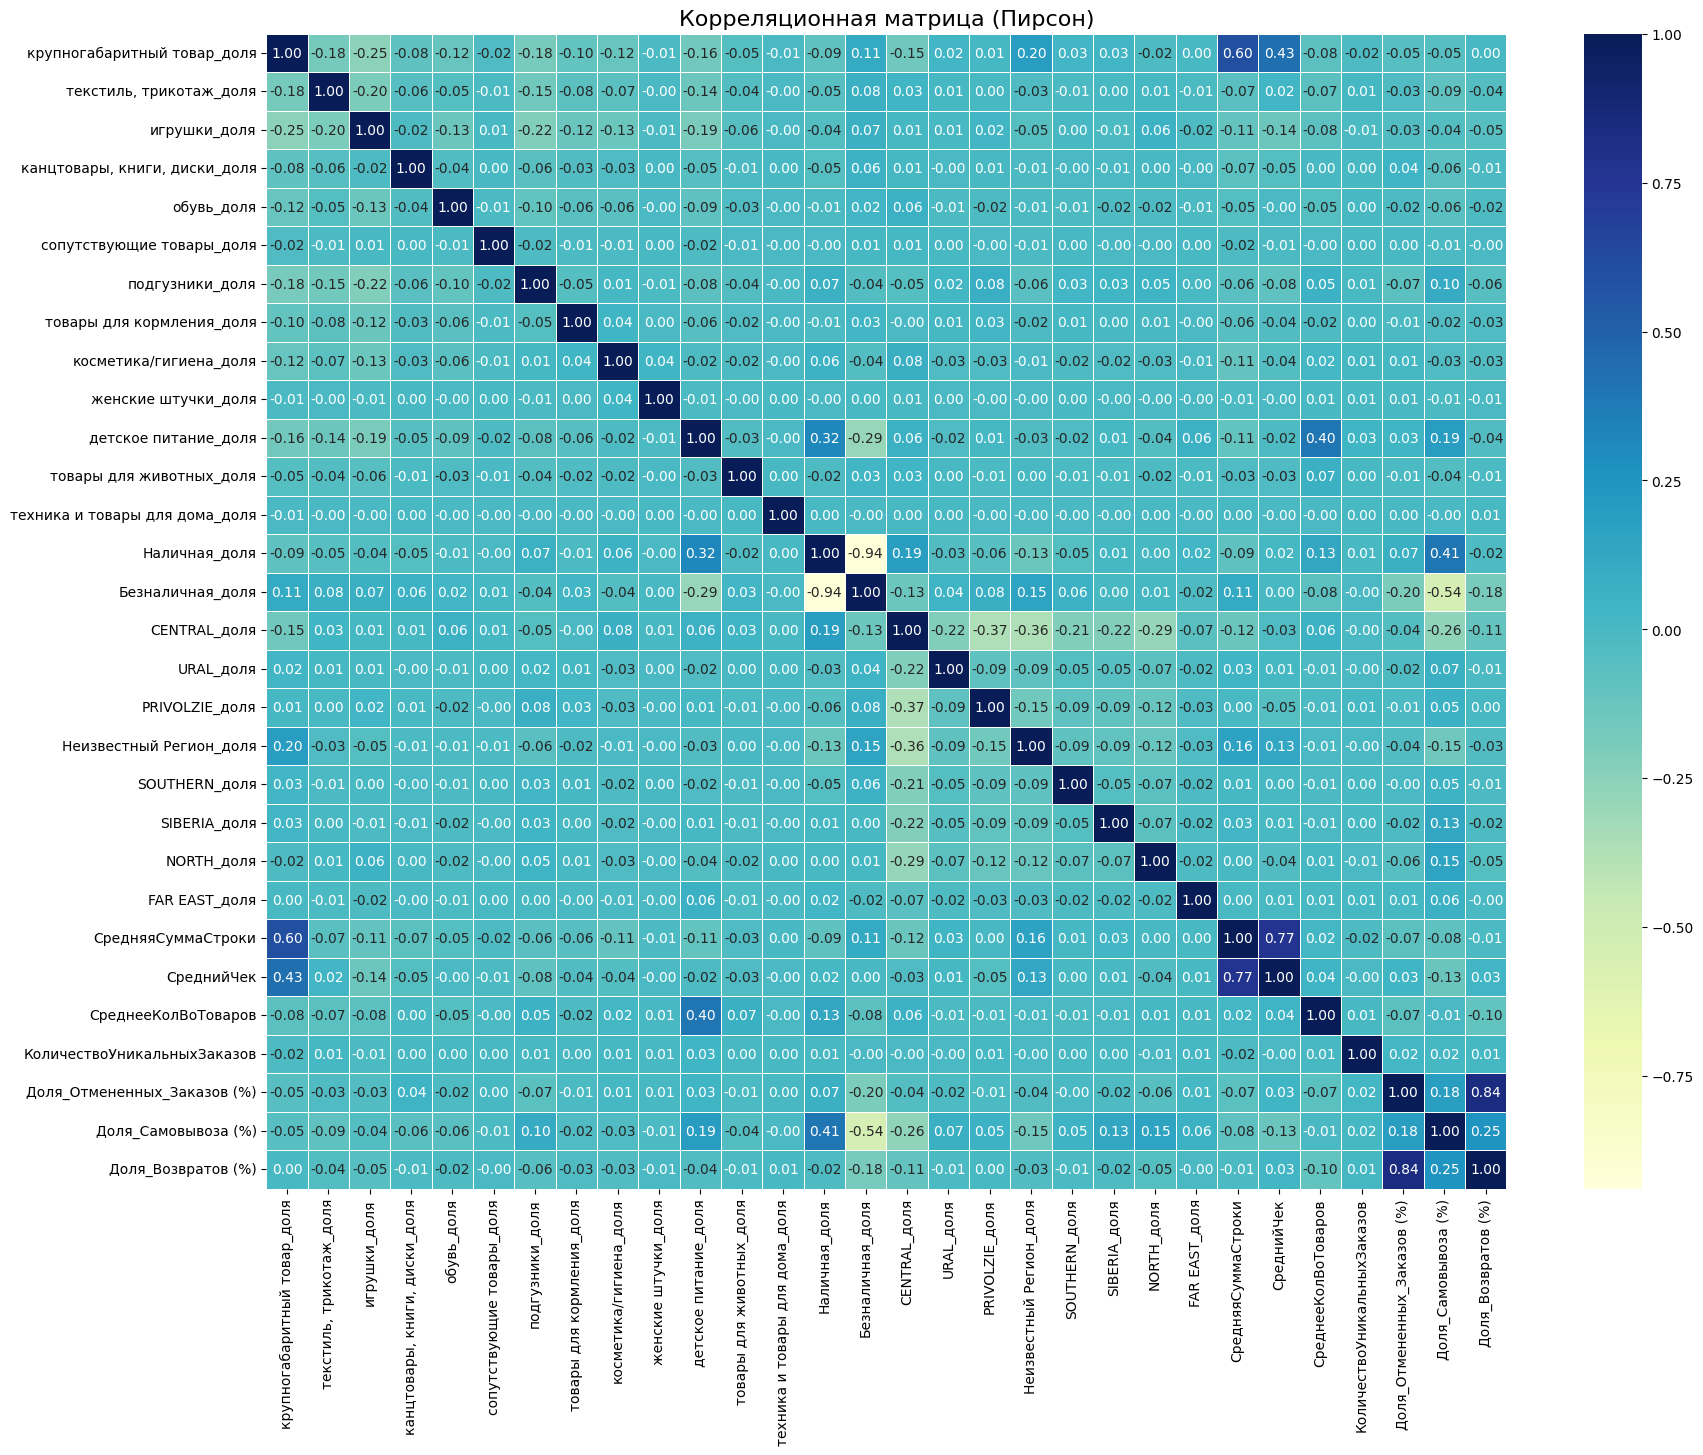

,крупногабаритный товар_доля,"текстиль, трикотаж_доля",игрушки_доля,"канцтовары, книги, диски_доля",обувь_доля,сопутствующие товары_доля,подгузники_доля,товары для кормления_доля,косметика/гигиена_доля,женские штучки_доля,детское питание_доля,товары для животных_доля,техника и товары для дома_доля,Наличная_доля,Безналичная_доля,CENTRAL_доля,URAL_доля,PRIVOLZIE_доля,Неизвестный Регион_доля,SOUTHERN_доля,SIBERIA_доля,NORTH_доля,FAR EAST_доля,СредняяСуммаСтроки,СреднийЧек,СреднееКолВоТоваров,КоличествоУникальныхЗаказов,Доля_Отмененных_Заказов (%),Доля_Самовывоза (%),Доля_Возвратов (%)
крупногабаритный товар_доля,1.00,-0.15,-0.26,-0.06,-0.12,-0.02,-0.18,-0.05,-0.07,-0.00,-0.13,-0.05,-0.01,-0.05,0.08,-0.10,0.01,-0.00,0.18,0.03,0.02,-0.03,0.00,0.44,0.39,-0.12,-0.00,-0.02,-0.07,-0.02
"текстиль, трикотаж_доля",-0.15,1.00,-0.13,0.04,0.08,0.04,-0.08,0.03,0.05,0.04,-0.06,-0.01,0.01,-0.01,0.04,0.06,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.06,0.10,-0.06,0.17,0.03,-0.09,0.02
игрушки_доля,-0.26,-0.13,1.00,0.13,-0.09,0.06,-0.19,-0.06,-0.05,0.01,-0.12,-0.04,0.01,-0.01,0.05,0.06,-0.01,0.00,-0.04,-0.00,-0.02,0.04,-0.02,-0.15,-0.13,-0.07,0.03,0.00,-0.09,-0.01
"канцтовары, книги, диски_доля",-0.06,0.04,0.13,1.00,0.04,0.07,0.00,0.05,0.09,0.05,0.04,0.02,0.03,-0.00,0.02,0.05,-0.01,-0.01,0.00,-0.00,-0.02,-0.01,-0.00,-0.20,-0.02,0.06,0.13,0.10,-0.06,0.08
обувь_доля,-0.12,0.08,-0.09,0.04,1.00,0.02,-0.09,-0.05,-0.03,0.03,-0.05,-0.01,0.01,0.00,0.02,0.08,-0.01,-0.03,0.00,-0.01,-0.02,-0.03,-0.01,-0.01,0.04,-0.06,0.11,0.02,-0.07,0.02
сопутствующие товары_доля,-0.02,0.04,0.06,0.07,0.02,1.00,-0.00,0.02,0.03,0.05,0.01,0.01,0.02,0.01,-0.00,0.02,0.00,-0.01,-0.00,0.01,-0.00,-0.01,-0.00,-0.05,0.01,0.02,0.06,0.03,-0.02,0.03
подгузники_доля,-0.18,-0.08,-0.19,0.00,-0.09,-0.00,1.00,0.12,0.26,0.03,0.17,0.00,-0.00,0.15,-0.11,0.02,-0.00,0.04,-0.05,0.01,0.01,0.01,0.01,-0.02,0.05,0.34,0.23,0.00,0.07,0.00
товары для кормления_доля,-0.05,0.03,-0.06,0.05,-0.05,0.02,0.12,1.00,0.28,0.06,0.13,0.01,0.01,0.05,-0.03,0.05,-0.01,-0.01,-0.00,0.00,-0.02,-0.02,-0.00,-0.17,0.02,0.12,0.17,0.06,-0.04,0.05
косметика/гигиена_доля,-0.07,0.05,-0.05,0.09,-0.03,0.03,0.26,0.28,1.00,0.11,0.22,0.05,0.02,0.12,-0.10,0.12,-0.04,-0.05,0.01,-0.03,-0.03,-0.04,-0.00,-0.24,0.06,0.24,0.20,0.08,-0.04,0.06
женские штучки_доля,-0.00,0.04,0.01,0.05,0.03,0.05,0.03,0.06,0.11,1.00,0.03,0.03,0.03,0.02,-0.01,0.02,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.00,-0.05,0.03,0.04,0.06,0.03,-0.01,0.03


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = data_clients.drop(columns=['id'])

# Матрица корреляции по Пирсону (по умолчанию)
plt.figure(figsize=(20, 15))
sns.heatmap(df_numeric.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица (Пирсон)", fontsize=16)
plt.show()

# Матрица корреляции по Спирману
corr_spearman = df_numeric.corr(method='spearman')
styled_corr = corr_spearman.style.background_gradient(cmap='coolwarm').format(precision=2)

# Для отображения в Jupyter или сохранения:
styled_corr


In [ ]:
# Удалим неинформативные признаки на основе высокой корреляции
columns_to_drop = ['Наличная_доля', 'Доля_Возвратов (%)']

df_cleaned = df_numeric.drop(columns=columns_to_drop)

print(f"Форма очищенной витрины: {df_cleaned.shape}")

Форма очищенной витрины: (114448, 28)


In [ ]:
corr_cleaned_spearman = df_cleaned.corr(method='spearman')

corr_cleaned_spearman.style.background_gradient(cmap='coolwarm').format(precision=2)

,крупногабаритный товар_доля,"текстиль, трикотаж_доля",игрушки_доля,"канцтовары, книги, диски_доля",обувь_доля,сопутствующие товары_доля,подгузники_доля,товары для кормления_доля,косметика/гигиена_доля,женские штучки_доля,детское питание_доля,товары для животных_доля,техника и товары для дома_доля,Безналичная_доля,CENTRAL_доля,URAL_доля,PRIVOLZIE_доля,Неизвестный Регион_доля,SOUTHERN_доля,SIBERIA_доля,NORTH_доля,FAR EAST_доля,СредняяСуммаСтроки,СреднийЧек,СреднееКолВоТоваров,КоличествоУникальныхЗаказов,Доля_Отмененных_Заказов (%),Доля_Самовывоза (%)
крупногабаритный товар_доля,1.00,-0.15,-0.26,-0.06,-0.12,-0.02,-0.18,-0.05,-0.07,-0.00,-0.13,-0.05,-0.01,0.08,-0.10,0.01,-0.00,0.18,0.03,0.02,-0.03,0.00,0.44,0.39,-0.12,-0.00,-0.02,-0.07
"текстиль, трикотаж_доля",-0.15,1.00,-0.13,0.04,0.08,0.04,-0.08,0.03,0.05,0.04,-0.06,-0.01,0.01,0.04,0.06,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.06,0.10,-0.06,0.17,0.03,-0.09
игрушки_доля,-0.26,-0.13,1.00,0.13,-0.09,0.06,-0.19,-0.06,-0.05,0.01,-0.12,-0.04,0.01,0.05,0.06,-0.01,0.00,-0.04,-0.00,-0.02,0.04,-0.02,-0.15,-0.13,-0.07,0.03,0.00,-0.09
"канцтовары, книги, диски_доля",-0.06,0.04,0.13,1.00,0.04,0.07,0.00,0.05,0.09,0.05,0.04,0.02,0.03,0.02,0.05,-0.01,-0.01,0.00,-0.00,-0.02,-0.01,-0.00,-0.20,-0.02,0.06,0.13,0.10,-0.06
обувь_доля,-0.12,0.08,-0.09,0.04,1.00,0.02,-0.09,-0.05,-0.03,0.03,-0.05,-0.01,0.01,0.02,0.08,-0.01,-0.03,0.00,-0.01,-0.02,-0.03,-0.01,-0.01,0.04,-0.06,0.11,0.02,-0.07
сопутствующие товары_доля,-0.02,0.04,0.06,0.07,0.02,1.00,-0.00,0.02,0.03,0.05,0.01,0.01,0.02,-0.00,0.02,0.00,-0.01,-0.00,0.01,-0.00,-0.01,-0.00,-0.05,0.01,0.02,0.06,0.03,-0.02
подгузники_доля,-0.18,-0.08,-0.19,0.00,-0.09,-0.00,1.00,0.12,0.26,0.03,0.17,0.00,-0.00,-0.11,0.02,-0.00,0.04,-0.05,0.01,0.01,0.01,0.01,-0.02,0.05,0.34,0.23,0.00,0.07
товары для кормления_доля,-0.05,0.03,-0.06,0.05,-0.05,0.02,0.12,1.00,0.28,0.06,0.13,0.01,0.01,-0.03,0.05,-0.01,-0.01,-0.00,0.00,-0.02,-0.02,-0.00,-0.17,0.02,0.12,0.17,0.06,-0.04
косметика/гигиена_доля,-0.07,0.05,-0.05,0.09,-0.03,0.03,0.26,0.28,1.00,0.11,0.22,0.05,0.02,-0.10,0.12,-0.04,-0.05,0.01,-0.03,-0.03,-0.04,-0.00,-0.24,0.06,0.24,0.20,0.08,-0.04
женские штучки_доля,-0.00,0.04,0.01,0.05,0.03,0.05,0.03,0.06,0.11,1.00,0.03,0.03,0.03,-0.01,0.02,-0.01,-0.01,0.00,0.00,-0.01,-0.01,-0.00,-0.05,0.03,0.04,0.06,0.03,-0.01


In [ ]:
df_cleaned.to_csv('/content/drive/My Drive/final_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/My Drive/final_data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

df.head()

,крупногабаритный товар_доля,"текстиль, трикотаж_доля",игрушки_доля,"канцтовары, книги, диски_доля",обувь_доля,сопутствующие товары_доля,подгузники_доля,товары для кормления_доля,косметика/гигиена_доля,женские штучки_доля,детское питание_доля,товары для животных_доля,техника и товары для дома_доля,Безналичная_доля,CENTRAL_доля,URAL_доля,PRIVOLZIE_доля,Неизвестный Регион_доля,SOUTHERN_доля,SIBERIA_доля,NORTH_доля,FAR EAST_доля,СредняяСуммаСтроки,СреднийЧек,СреднееКолВоТоваров,КоличествоУникальныхЗаказов,Доля_Отмененных_Заказов (%),Доля_Самовывоза (%)
0,0.06,0.17,0.33,0.39,0.0,0.0,0.00,0.06,0.00,0.00,0.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1020.58,12098.00,1.50,1,0.0,0.0
1,0.00,0.18,0.12,0.18,0.0,0.0,0.18,0.00,0.00,0.00,0.35,0.00,0.0,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,395.67,3337.33,1.13,2,1.0,0.5
2,0.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3325.00,3325.00,1.00,1,0.0,0.0
3,0.01,0.03,0.00,0.00,0.0,0.0,0.04,0.00,0.09,0.01,0.74,0.07,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.91,4751.43,1.43,2,0.0,0.0
4,0.00,0.00,0.50,0.00,0.0,0.0,0.00,0.50,0.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,132.00,528.00,1.00,1,0.0,0.0


Теперь посмотрим на наличие выбросов.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

model = IsolationForest(n_estimators=20, random_state=0)
outliers = model.fit_predict(df.values)

outliers = (outliers + 1) // 2

percent_outliers = 1 - (np.sum(outliers) / df.shape[0])
print('% выбросов по Isolation Forest:', round(percent_outliers * 100, 2), '%')

% выбросов по Isolation Forest: 2.28 %


In [ ]:
# удалим выбросы
df = df.loc[np.array(df.index)[outliers == 1]]

In [ ]:
df.shape

(111836, 28)

Теперь перейдем к нормализации данных

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)

df_scaled.to_csv('/content/drive/My Drive/данные_для_кластеризации.csv', index=False)

# Кластеризация K-means

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

file_path = '/content/drive/My Drive/данные_для_кластеризации.csv'
df = pd.read_csv(file_path)

if 'id' in df.columns:
    df.set_index('id', inplace=True)

Начнем с метода Локтя.

Вычисление искажений (distortions) для каждого k...
K = 1 из 15 завершено
K = 2 из 15 завершено
K = 3 из 15 завершено
K = 4 из 15 завершено
K = 5 из 15 завершено
K = 6 из 15 завершено
K = 7 из 15 завершено
K = 8 из 15 завершено
K = 9 из 15 завершено
K = 10 из 15 завершено
K = 11 из 15 завершено
K = 12 из 15 завершено
K = 13 из 15 завершено
K = 14 из 15 завершено
K = 15 из 15 завершено


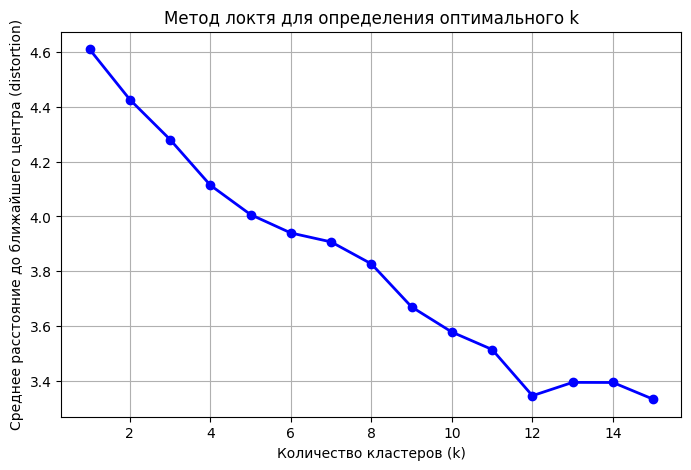

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Предполагаем, что X — это нормализованные данные (например, X = df.values)
X = df.values

# Метод локтя: определение оптимального числа кластеров
distortions = []
K = range(1, 16)

print("Вычисление искажений (distortions) для каждого k...")

for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7)
    kmeans.fit(X)

    # Среднее расстояние до ближайшего центра
    distortion = np.mean(np.min(cdist(X, kmeans.cluster_centers_, metric='euclidean'), axis=1))
    distortions.append(distortion)

    print(f"K = {k} из {K[-1]} завершено")

# Построение графика локтя
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bo-', linewidth=2)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Среднее расстояние до ближайшего центра (distortion)')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True)
plt.show()


Здесь наиболее явные перегиб - 5, 9 и 12.

Теперь будем использовать  Индекс Дэвиса-Булдина

k = 2, DB index = 1.9771
k = 3, DB index = 1.4962
k = 4, DB index = 2.3364
k = 5, DB index = 2.2769
k = 6, DB index = 1.9728
k = 7, DB index = 1.8547
k = 8, DB index = 1.9002
k = 9, DB index = 1.8203
k = 10, DB index = 1.7371
k = 11, DB index = 1.6344
k = 12, DB index = 1.5005
k = 13, DB index = 1.4468
k = 14, DB index = 1.3584
k = 15, DB index = 1.3458


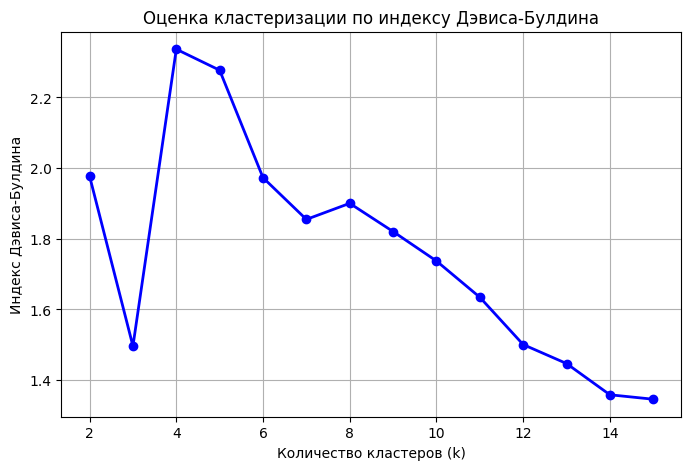

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

results_db_kmeans = {}

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)

    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans[i] = db_index
    print(f"k = {i}, DB index = {round(db_index, 4)}")

plt.figure(figsize=(8, 5))
plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()), 'bo-', linewidth=2)
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Индекс Дэвиса-Булдина")
plt.title("Оценка кластеризации по индексу Дэвиса-Булдина")
plt.grid(True)
plt.show()

Минимум на графике — это оптимальное число кластеров, соответственно здесь 15.

Silhouette Coefficient

k = 2, Silhouette score = 0.117
k = 3, Silhouette score = 0.1194
k = 4, Silhouette score = 0.1052
k = 5, Silhouette score = 0.1045
k = 6, Silhouette score = 0.1224
k = 7, Silhouette score = 0.1428
k = 8, Silhouette score = 0.0927
k = 9, Silhouette score = 0.1236
k = 10, Silhouette score = 0.1331
k = 11, Silhouette score = 0.1684
k = 12, Silhouette score = 0.1686
k = 13, Silhouette score = 0.1753
k = 14, Silhouette score = 0.1774
k = 15, Silhouette score = 0.1861


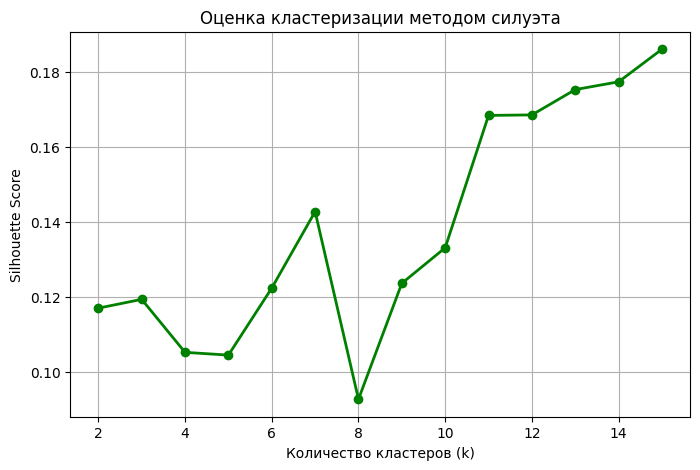

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

results_sil_kmeans = {}

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, labels)
    results_sil_kmeans[i] = sil_score
    print(f"k = {i}, Silhouette score = {round(sil_score, 4)}")

# Визуализация
plt.figure(figsize=(8, 5))
plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), 'go-', linewidth=2)
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Silhouette Score")
plt.title("Оценка кластеризации методом силуэта")
plt.grid(True)
plt.show()

Максимум на графике — оптимальное значение k


k = 2, Calinski-Harabasz score = 3490.52
k = 3, Calinski-Harabasz score = 3324.27
k = 4, Calinski-Harabasz score = 4611.99
k = 5, Calinski-Harabasz score = 4856.11
k = 6, Calinski-Harabasz score = 5227.67
k = 7, Calinski-Harabasz score = 5352.99
k = 8, Calinski-Harabasz score = 5517.25
k = 9, Calinski-Harabasz score = 5650.55
k = 10, Calinski-Harabasz score = 5648.79
k = 11, Calinski-Harabasz score = 6037.12
k = 12, Calinski-Harabasz score = 6370.2
k = 13, Calinski-Harabasz score = 6478.67
k = 14, Calinski-Harabasz score = 6888.55
k = 15, Calinski-Harabasz score = 6989.62


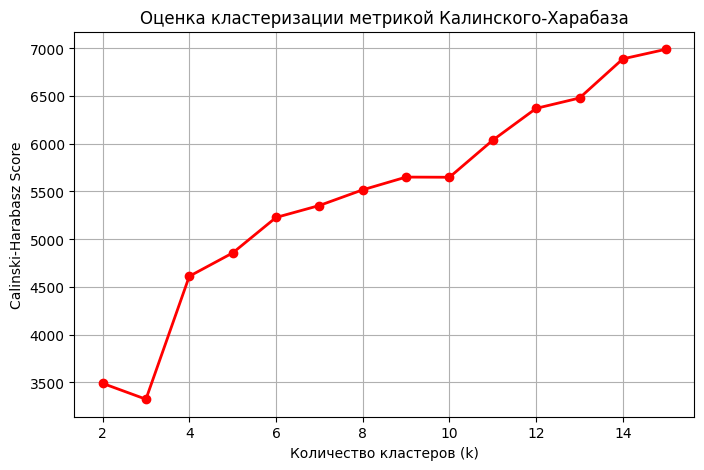

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

results_ch_kmeans = {}

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)

    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans[i] = ch_score
    print(f"k = {i}, Calinski-Harabasz score = {round(ch_score, 2)}")

plt.figure(figsize=(8, 5))
plt.plot(list(results_ch_kmeans.keys()), list(results_ch_kmeans.values()), 'ro-', linewidth=2)
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Оценка кластеризации метрикой Калинского-Харабаза")
plt.grid(True)
plt.show()

Таким образом, наиболее оптимальными являются 5, 9, 12 и 15 кластеров.

### K-means для 5 кластеров.

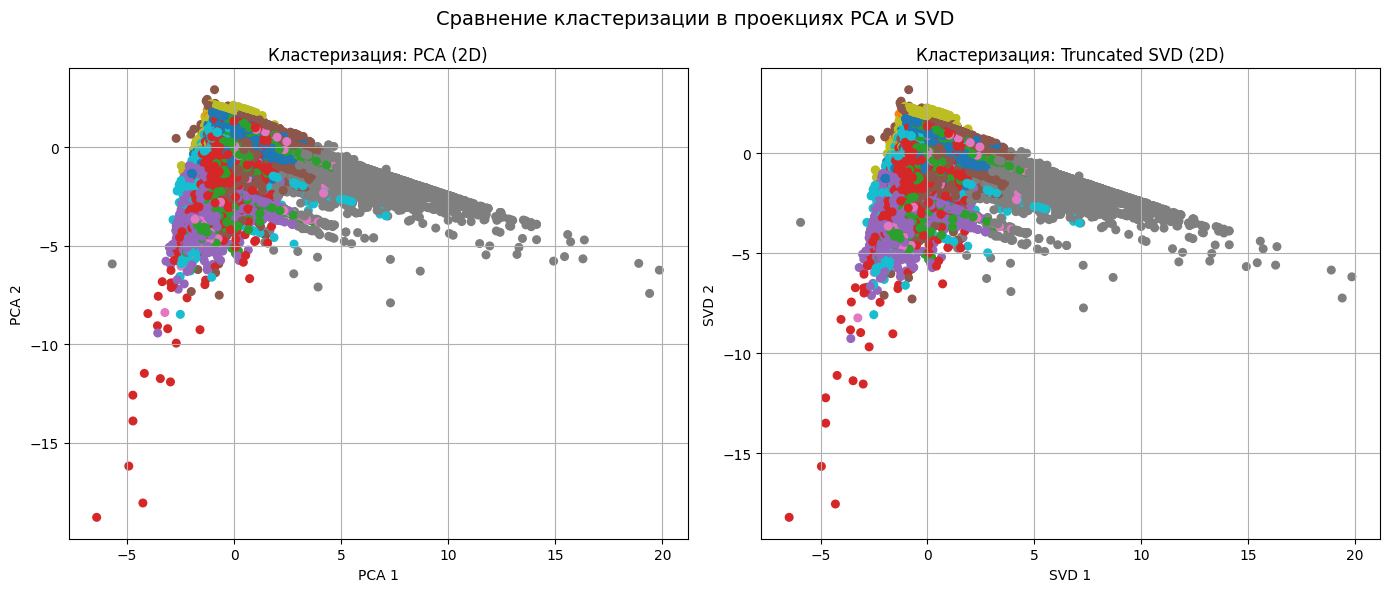

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD

# Снижение размерности до 2 компонент
X_pca_2d = PCA(n_components=2).fit_transform(X)
X_svd_2d = TruncatedSVD(n_components=2).fit_transform(X)

# Создание фигуры с двумя подграфиками
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Визуализация PCA ---
axs[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='tab10', s=30)
axs[0].set_title('Кластеризация: PCA (2D)')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')
axs[0].grid(True)

# --- Визуализация SVD ---
axs[1].scatter(X_svd_2d[:, 0], X_svd_2d[:, 1], c=labels, cmap='tab10', s=30)
axs[1].set_title('Кластеризация: Truncated SVD (2D)')
axs[1].set_xlabel('SVD 1')
axs[1].set_ylabel('SVD 2')
axs[1].grid(True)

plt.suptitle('Сравнение кластеризации в проекциях PCA и SVD', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans

K = 5
kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7)
kmeanModel.fit(X)

labels = kmeanModel.labels_
centroids = kmeanModel.cluster_centers_

df['cluster'] = labels

for i in range(K):
    count = len(df[df['cluster'] == i])
    print(f"Сегмент {i+1}: {count} объектов")

print(f"Всего наблюдений: {len(df)}")

Сегмент 1: 13758 объектов
Сегмент 2: 42151 объектов
Сегмент 3: 11914 объектов
Сегмент 4: 12033 объектов
Сегмент 5: 31980 объектов
Всего наблюдений: 111836


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

sil_score = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)

print(f'Silhouette Score (k={K}): {round(sil_score, 4)}')
print(f'Davies-Bouldin Index (k={K}): {round(db_index, 4)}')
print(f'Calinski-Harabasz Index (k={K}): {round(ch_index, 2)}')

Silhouette Score (k=5): 0.1035
Davies-Bouldin Index (k=5): 2.6215
Calinski-Harabasz Index (k=5): 6314.34


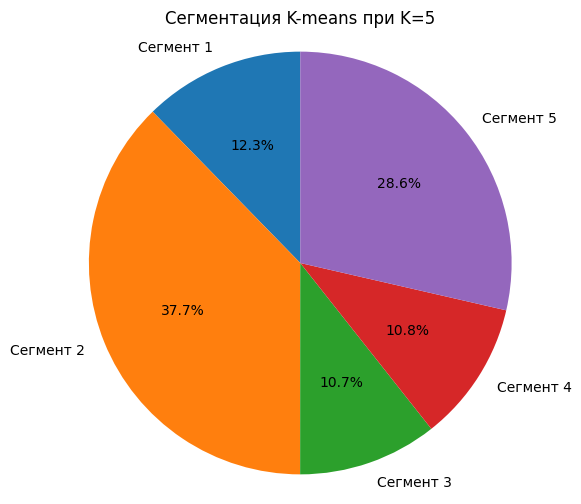

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K = 5
kmeans = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7)
labels = kmeans.fit_predict(X)

df['cluster'] = labels

cluster_sizes = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(cluster_sizes, labels=[f'Сегмент {i+1}' for i in cluster_sizes.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Сегментация K-means при K=5')
plt.axis('equal')
plt.show()

### K-means для 9 кластеров

In [ ]:
from sklearn.cluster import KMeans

K = 9

kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
labels = kmeanModel.labels_
centroids = kmeanModel.cluster_centers_

df['cluster'] = labels

for i in range(K):
    cluster_size = len(df[df['cluster'] == i])
    print(f"Сегмент {i+1}: {cluster_size} объектов")

print(f"Всего объектов: {len(df)}")

Сегмент 1: 42830 объектов
Сегмент 2: 9000 объектов
Сегмент 3: 18871 объектов
Сегмент 4: 8734 объектов
Сегмент 5: 9358 объектов
Сегмент 6: 5454 объектов
Сегмент 7: 5144 объектов
Сегмент 8: 12444 объектов
Сегмент 9: 1 объектов
Всего объектов: 111836


In [ ]:
df.groupby('cluster').sum().to_excel('9_clusters.xlsx')

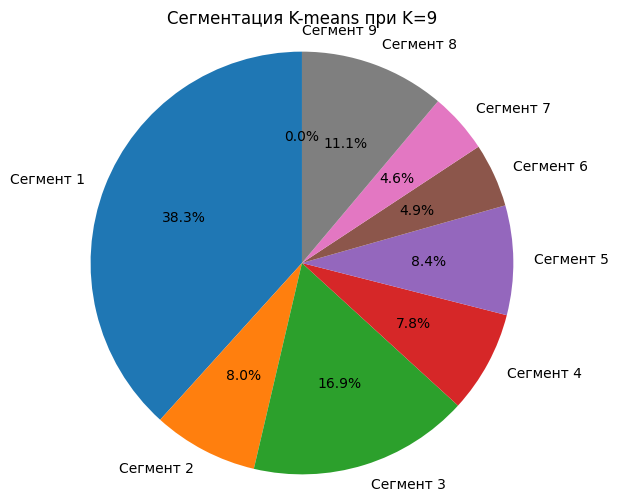

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K = 9
kmeans = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7)
labels = kmeans.fit_predict(X)

df['cluster'] = labels

cluster_sizes = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(cluster_sizes, labels=[f'Сегмент {i+1}' for i in cluster_sizes.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Сегментация K-means при K=9')
plt.axis('equal')
plt.show()

### K-means для 12 кластеров

In [ ]:
from sklearn.cluster import KMeans

K = 12

kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)

labels = kmeanModel.labels_
centroids = kmeanModel.cluster_centers_

df['cluster'] = labels

for i in range(K):
    count = len(df[df['cluster'] == i])
    print(f"Сегмент {i+1}: {count} объектов")

print(f"Всего объектов: {len(df)}")

Сегмент 1: 38695 объектов
Сегмент 2: 5056 объектов
Сегмент 3: 5094 объектов
Сегмент 4: 12072 объектов
Сегмент 5: 8141 объектов
Сегмент 6: 9705 объектов
Сегмент 7: 4824 объектов
Сегмент 8: 511 объектов
Сегмент 9: 8768 объектов
Сегмент 10: 6972 объектов
Сегмент 11: 1255 объектов
Сегмент 12: 10743 объектов
Всего объектов: 111836


In [ ]:
df.to_excel('/content/drive/MyDrive/labels_for_12_clusters.xlsx')

In [ ]:
df.groupby('cluster').sum().to_excel('12_clusters.xlsx')

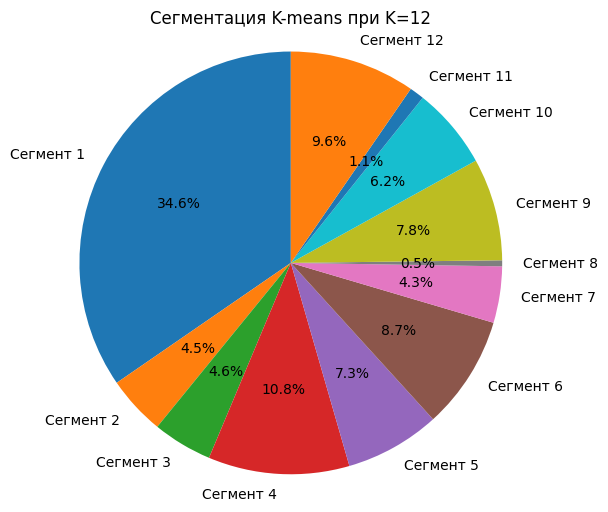

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K = 12
kmeans = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7)
labels = kmeans.fit_predict(X)

df['cluster'] = labels

cluster_sizes = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(cluster_sizes, labels=[f'Сегмент {i+1}' for i in cluster_sizes.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Сегментация K-means при K=12')
plt.axis('equal')
plt.show()

### K-means для 15 кластеров.

In [ ]:
from sklearn.cluster import KMeans

K = 15

kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
labels = kmeanModel.labels_
centroids = kmeanModel.cluster_centers_

df['cluster'] = labels

for i in range(K):
    count = len(df[df['cluster'] == i])
    print(f"Сегмент {i+1}: {count} объектов")

print(f"Всего объектов: {len(df)}")

Сегмент 1: 7267 объектов
Сегмент 2: 36071 объектов
Сегмент 3: 10097 объектов
Сегмент 4: 8743 объектов
Сегмент 5: 10374 объектов
Сегмент 6: 1 объектов
Сегмент 7: 5277 объектов
Сегмент 8: 127 объектов
Сегмент 9: 8 объектов
Сегмент 10: 4923 объектов
Сегмент 11: 1262 объектов
Сегмент 12: 11257 объектов
Сегмент 13: 5308 объектов
Сегмент 14: 8406 объектов
Сегмент 15: 2715 объектов
Всего объектов: 111836


In [ ]:
df.groupby('cluster').sum().to_excel('15_clusters.xlsx')

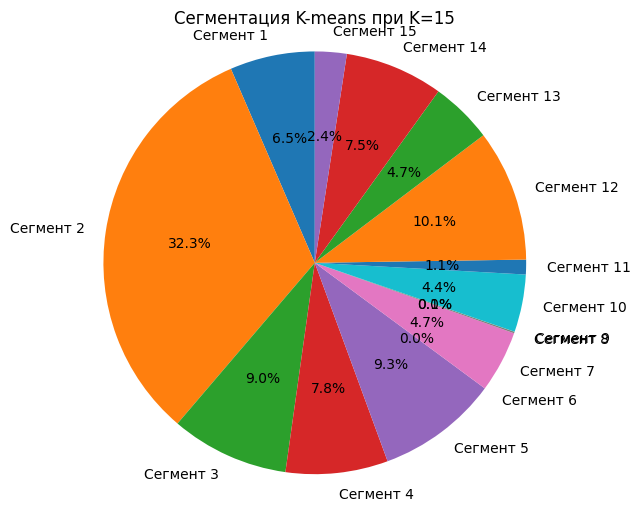

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K = 15
kmeans = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7)
labels = kmeans.fit_predict(X)

df['cluster'] = labels

cluster_sizes = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(cluster_sizes, labels=[f'Сегмент {i+1}' for i in cluster_sizes.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Сегментация K-means при K=15')
plt.axis('equal')
plt.show()

In [ ]:
# Очистка и стандартизация названий столбцов
df.columns = df.columns.str.strip().str.lower()


In [ ]:
df = pd.read_csv('/content/drive/My Drive/данные_для_кластеризации.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111836 entries, 0 to 111835
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   крупногабаритный товар_доля     111836 non-null  float64
 1   текстиль, трикотаж_доля         111836 non-null  float64
 2   игрушки_доля                    111836 non-null  float64
 3   канцтовары, книги, диски_доля   111836 non-null  float64
 4   обувь_доля                      111836 non-null  float64
 5   сопутствующие товары_доля       111836 non-null  float64
 6   подгузники_доля                 111836 non-null  float64
 7   товары для кормления_доля       111836 non-null  float64
 8   косметика/гигиена_доля          111836 non-null  float64
 9   женские штучки_доля             111836 non-null  float64
 10  детское питание_доля            111836 non-null  float64
 11  товары для животных_доля        111836 non-null  float64
 12  техника и товары

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/данные_для_кластеризации.csv')

df['Segment'] = kmeanModel.labels_  # или labels


if 'cluster' in df.columns:
    df.rename(columns={'cluster': 'Segment'}, inplace=True)


# Категории товаров
categories = ['крупногабаритный товар_доля', 'текстиль, трикотаж_доля', 'игрушки_доля',
              'канцтовары, книги, диски_доля', 'обувь_доля', 'сопутствующие товары_доля',
              'подгузники_доля', 'товары для кормления_доля', 'косметика/гигиена_доля',
              'женские штучки_доля', 'детское питание_доля', 'товары для животных_доля',
              'техника и товары для дома_доля']

# Каналы продаж
channels = ['Безналичная_доля']

# Регионы
regions = ['CENTRAL_доля', 'URAL_доля', 'PRIVOLZIE_доля', 'Неизвестный Регион_доля',
           'SOUTHERN_доля', 'SIBERIA_доля', 'NORTH_доля', 'FAR EAST_доля']

# Метрики
metrics = ['СреднийЧек', 'СреднееКолВоТоваров', 'КоличествоУникальныхЗаказов',
           'Доля_Отмененных_Заказов (%)', 'Доля_Самовывоза (%)']

# Сводные таблицы
pivot_categories = df.groupby('Segment')[categories].mean()
pivot_channels = df.groupby('Segment')[channels].mean()
pivot_regions = df.groupby('Segment')[regions].mean()
pivot_metrics = df.groupby('Segment')[metrics].mean()

# Объединяем
summary = pd.concat([pivot_categories, pivot_channels, pivot_regions, pivot_metrics], axis=1)
summary.index.name = 'Segment'
summary = summary.round(2)

# Сохраняем
summary.to_excel('/content/drive/MyDrive/segmentation_summary.xlsx')
print("Сводная таблица сохранена: segmentation_summary.xlsx")


Сводная таблица сохранена: segmentation_summary.xlsx


# Кластеризация Expectation-Maximization Algorithm(EM-кластеризация)

# Кластеризация Expectation-Maximization Algorithm(EM-кластеризация)

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [2]:
from sklearn.mixture import GaussianMixture

Силуэт

Обработка кластеров: 2...
Обработка кластеров: 3...
Обработка кластеров: 4...
Обработка кластеров: 5...
Обработка кластеров: 6...
Обработка кластеров: 7...
Обработка кластеров: 8...
Обработка кластеров: 9...
Обработка кластеров: 10...
Обработка кластеров: 11...
Обработка кластеров: 12...
Обработка кластеров: 13...


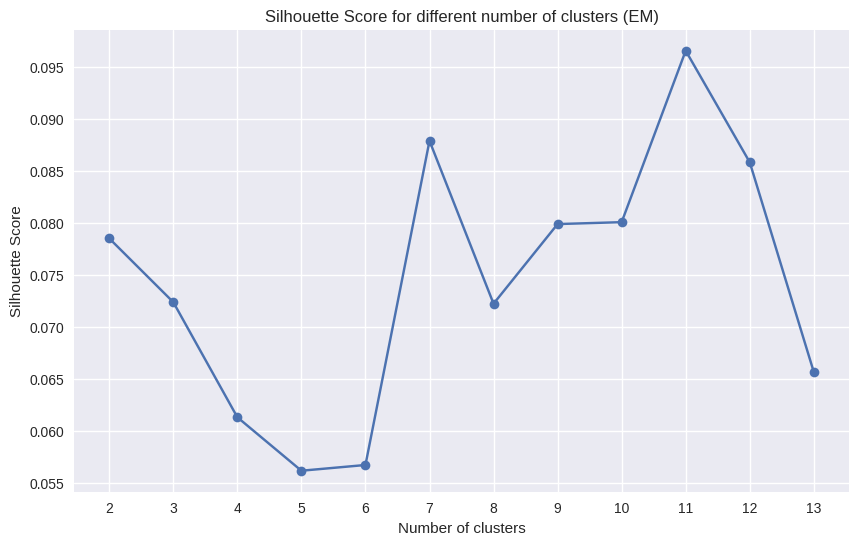

In [7]:
results_sil_em = {}
X = df.values

for i in range(2, 14):
    print(f'Обработка кластеров: {i}...')

    gmm = GaussianMixture(n_components=i, random_state=0)
    labels = gmm.fit_predict(X)

    sil_score = silhouette_score(X, labels)
    results_sil_em[i] = sil_score

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), marker='o')
plt.xticks(np.arange(2, 14, 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.grid(True)
plt.show()

Method of Elbow

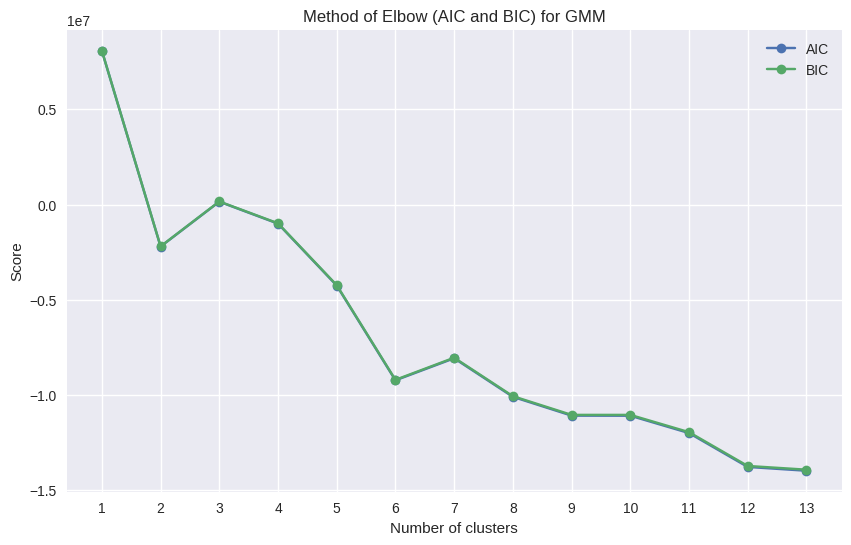

In [8]:
n_components = range(1, 14)

aic_scores = []
bic_scores = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(X)
    aic_scores.append(gmm.aic(X))
    bic_scores.append(gmm.bic(X))

plt.figure(figsize=(10, 6))
plt.plot(n_components, aic_scores, label='AIC', marker='o')
plt.plot(n_components, bic_scores, label='BIC', marker='o')
plt.xticks(n_components)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Method of Elbow (AIC and BIC) for GMM')
plt.legend()
plt.grid(True)
plt.show()


EM для 7 кластеров

In [ ]:
from sklearn import preprocessing
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/данные_для_кластеризации.csv', index_col=False)
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(df.iloc[:,1:])

In [ ]:
import scipy

scipy.stats.normaltest(X)

NormaltestResult(statistic=array([ 48380.30907775,  23812.56310377, 129757.29837044,  94346.69251492,
       298569.04642885,  53575.71959571, 102557.48491629,  95625.14467587,
       329615.40818531,  58825.07688614, 168694.58624519, 461850.78843818,
        43739.3514468 , 384271.42454713,  93306.94251478,  45242.7670197 ,
        41948.88057927,  93696.98931716,  89986.43922878,  67737.15025744,
       209179.04487155, 108889.23978217, 121600.3217661 , 253950.9856759 ,
       622926.47433387,  35745.72566962,  50001.21904219]), pvalue=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
Y_pca = PCA(n_components=3).fit_transform(X);
Y_svd = TruncatedSVD(n_components=3).fit_transform(X);

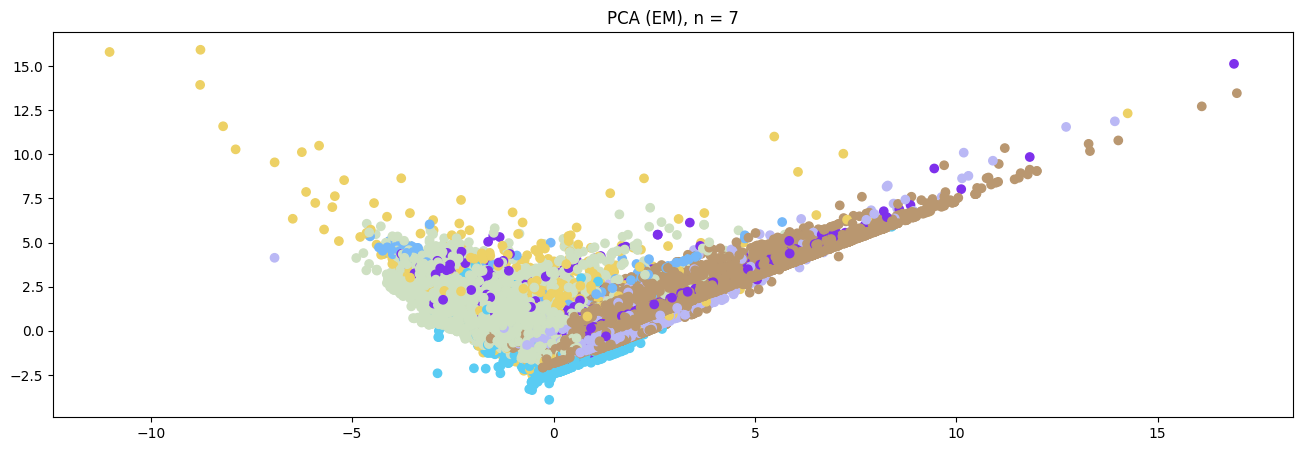

In [ ]:
n = 7
gm = GaussianMixture(n_components=n)
labels = gm.fit_predict(X)
df_labels = pd.DataFrame()
df_labels['Labels'] = labels

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 7')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [ ]:
df = df_labels

In [ ]:
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]

data_sel6 = {0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7}


In [ ]:
for i in data_sel6.values():
  print(len(i))

31019
6253
7461
513
33496
27852
5242


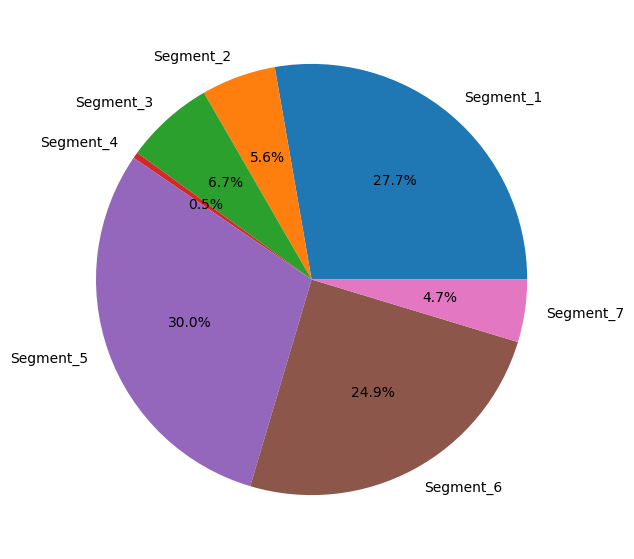

In [ ]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel6.values()]

labels = [('Segment_' + str(i + 1)) for i in range(len(data))]

plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [ ]:
df['Labels'] = df_labels['Labels']

In [ ]:
#сводная таблица по всем клиентам с номерами кластеров в соответствии с сегментацией
df.to_excel('/content/drive/My Drive/labels_for_6_klasters.xlsx')

In [ ]:
df1 = pd.read_excel('/content/drive/My Drive/labels_for_6_klasters.xlsx', index_col=0) # таблица с кластерами

In [ ]:
df_ind = df1

In [ ]:
df = pd.read_excel('/content/TN_сводная.xlsx', index_col=0) # сводная таблица

In [ ]:
df['Klaster'] = None

In [ ]:
df.shape

(114448, 28)

In [ ]:
df = df.reset_index()

In [ ]:
if 'id' not in df.columns:
    df = df.reset_index(names=['номер телефона'])
else:
    df = df.copy()
    df = df.rename(columns={'id': 'номер телефона'})

df['id'] = range(len(df))

cols = ['id'] + [col for col in df.columns if col != 'id']
df = df[cols]

df.to_csv('processed_data.csv', index=False)


In [ ]:
df_ind = df_ind.reset_index(names=['id'])

In [ ]:
df_ind

,id,Labels
0,0,1
1,1,1
2,2,4
3,3,2
4,4,0
...,...,...
111831,111831,5
111832,111832,4
111833,111833,0
111834,111834,4


In [ ]:
keys = ['id']
df = df.assign(Klaster=df[keys].join(df_ind.drop_duplicates(keys).set_index(keys).Labels, on=keys).Labels)


In [ ]:
df_sum = df.groupby('Klaster').sum()

In [ ]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0.0 to 6.0
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7 non-null      int64  
 1   номер телефона             7 non-null      object 
 2   детское питание            7 non-null      int64  
 3   женские штучки             7 non-null      int64  
 4   игрушки                    7 non-null      int64  
 5   канцтовары, книги, диски   7 non-null      int64  
 6   косметика/гигиена          7 non-null      int64  
 7   крупногабаритный товар     7 non-null      int64  
 8   обувь                      7 non-null      int64  
 9   подгузники                 7 non-null      int64  
 10  сопутствующие товары       7 non-null      int64  
 11  текстиль, трикотаж         7 non-null      int64  
 12  техника и товары для дома  7 non-null      int64  
 13  товары для животных        7 non-null      int64  
 14 

In [ ]:
# доли
product_cols = [
    'детское питание', 'женские штучки', 'игрушки', 'канцтовары, книги, диски', 'косметика/гигиена',
    'крупногабаритный товар', 'обувь', 'подгузники', 'сопутствующие товары',
    'текстиль, трикотаж', 'техника и товары для дома', 'товары для животных', 'товары для кормления'
]

df_sum[product_cols] = df_sum[product_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
payment_cols = ['Безналичная', 'Наличная']
df_sum[payment_cols] = df_sum[payment_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
region_cols = [
    'CENTRAL', 'FAR EAST', 'NORTH', 'PRIVOLZIE',
    'SIBERIA', 'SOUTHERN', 'URAL', 'Неизвестный Регион'
]
df_sum[region_cols] = df_sum[region_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
df_sum['Процент_скид_от_общ_суммы_покупки'] = df_sum['Сумма Покупки'] / df_sum['Сумма Покупки'] * 100  # если скидка будет — поменяешь


In [ ]:
df_sum['Средний_чек'] = df_sum['Сумма Покупки'] / df_sum['КОЛ-ВО ЧЕКОВ']


In [ ]:
df_sum['Сред_к-во_тов_в_чеке'] = df_sum['К-во выкупл.тов.'] / df_sum['КОЛ-ВО ЧЕКОВ']


In [ ]:
df_sum.to_excel('6_klasters_for_svod.xlsx')

In [ ]:
df_sum = df_sum.drop(columns=['номер телефона'])

In [ ]:
df_sum = df_sum.drop(columns=['id'])

In [ ]:
df_sum = df_sum.round(2)


In [ ]:
# сводник
df_sum

,детское питание,женские штучки,игрушки,"канцтовары, книги, диски",косметика/гигиена,крупногабаритный товар,обувь,подгузники,сопутствующие товары,"текстиль, трикотаж",техника и товары для дома,товары для животных,товары для кормления,К-во выкупл.тов.,CENTRAL,FAR EAST,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Неизвестный Регион,Безналичная,Наличная,Сумма Покупки,КОЛ-ВО ЧЕКОВ,Средний_чек,Процент_скид_от_общ_суммы_покупки,Сред_к-во_тов_в_чеке
Klaster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.01,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,270320,60.69,1.05,4.17,8.86,4.99,3.65,3.79,12.79,54.78,45.22,164783780.6,48008,3432.42,100.0,5.63
1.0,0.06,0.0,0.02,0.01,0.01,0.01,0.01,0.01,0.0,0.02,0.0,0.00,0.01,64812,61.85,1.16,4.17,9.23,3.20,3.17,2.49,14.74,59.95,40.05,41614889.3,12002,3467.33,100.0,5.40
2.0,0.06,0.0,0.02,0.00,0.01,0.01,0.00,0.01,0.0,0.02,0.0,0.00,0.01,65590,60.71,0.35,5.10,8.49,4.54,2.81,4.12,13.88,53.71,46.29,39268102.0,11596,3386.35,100.0,5.66
3.0,0.81,0.0,0.33,0.08,0.14,0.12,0.06,0.25,0.0,0.29,0.0,0.04,0.11,4160,60.43,0.02,5.48,10.77,6.68,1.61,3.46,11.54,56.73,43.27,2612076.0,793,3293.92,100.0,5.25
4.0,0.01,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,288577,61.29,1.08,5.50,8.86,3.05,4.06,2.82,13.35,54.21,45.79,177049229.9,51183,3459.14,100.0,5.64
5.0,0.02,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,245360,61.74,1.21,5.83,8.03,4.12,2.62,3.00,13.45,53.34,46.66,147533666.8,42880,3440.62,100.0,5.72
6.0,0.08,0.0,0.03,0.01,0.01,0.01,0.01,0.02,0.0,0.02,0.0,0.01,0.01,45747,61.41,1.06,4.22,8.90,5.30,2.77,3.95,12.38,54.76,45.24,26851137.2,7888,3404.05,100.0,5.80


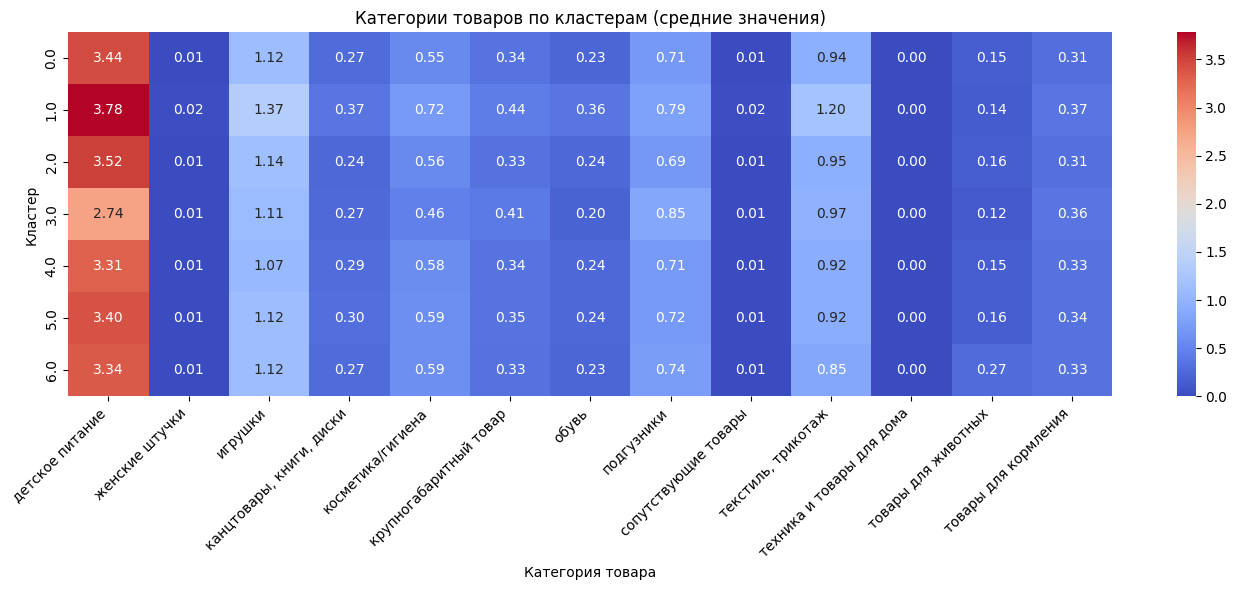

In [ ]:
product_pivot = df.groupby('Klaster')[product_cols].mean()

plt.figure(figsize=(14, 6))
sns.heatmap(product_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Категории товаров по кластерам (средние значения)')
plt.ylabel('Кластер')
plt.xlabel('Категория товара')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

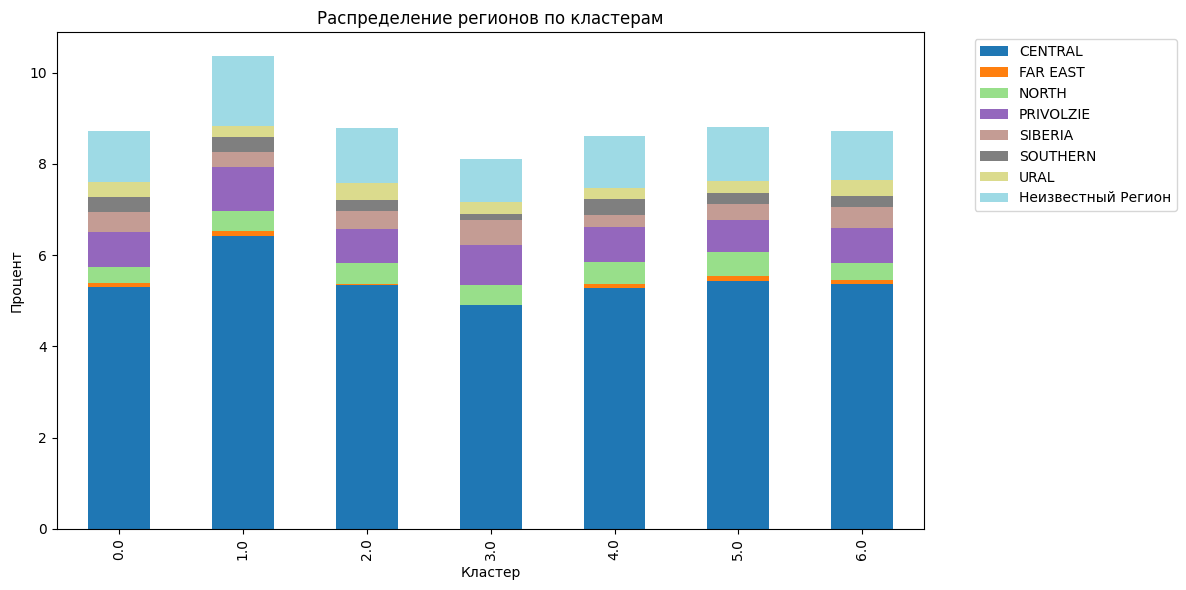

In [ ]:
region_cols = ['CENTRAL', 'FAR EAST', 'NORTH', 'PRIVOLZIE', 'SIBERIA', 'SOUTHERN', 'URAL', 'Неизвестный Регион']
region_pivot = df.groupby('Klaster')[region_cols].mean()

region_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Распределение регионов по кластерам')
plt.ylabel('Процент')
plt.xlabel('Кластер')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ЕМ для 11 кластеров

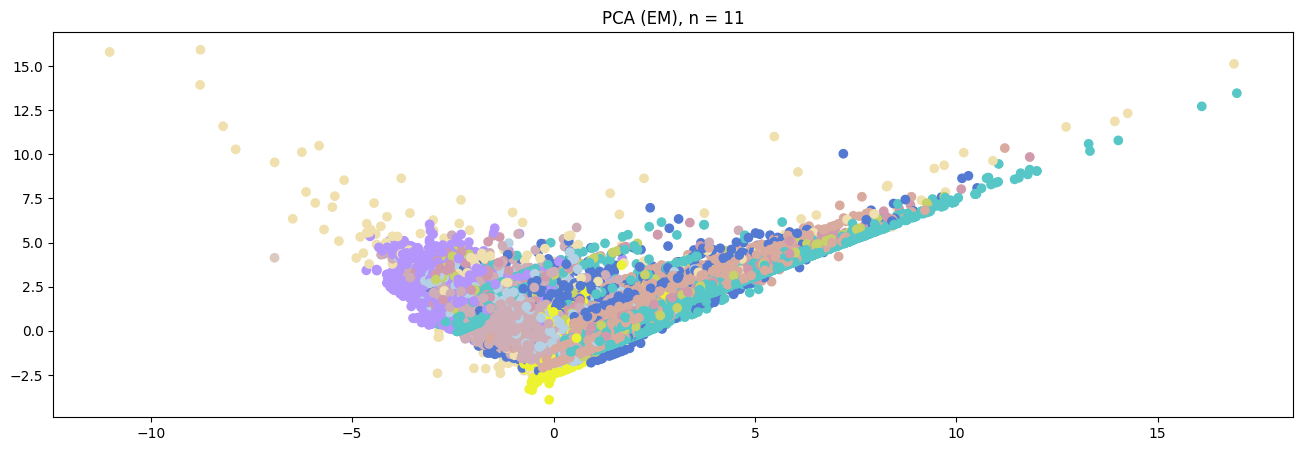

In [ ]:
n = 11
gm = GaussianMixture(n_components=n)
labels = gm.fit_predict(X)
df_labels = pd.DataFrame()
df_labels['Labels'] = labels

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 11')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [ ]:
df = df_labels
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]

data_sel11={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11}

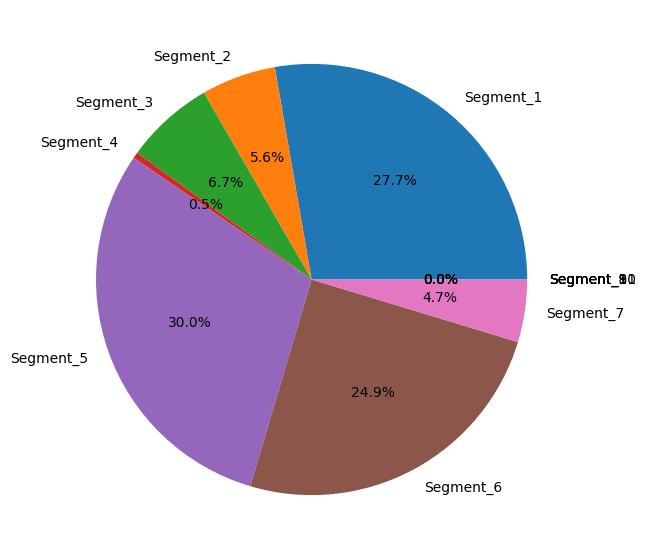

In [ ]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel11.values()]
labels = [('Segment_' + str(i)) for i in range(1, 12)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [ ]:
df_11 = pd.read_csv('/content/drive/My Drive/данные_для_кластеризации.csv', index_col=False)

In [ ]:
df_11['Labels'] = df_labels['Labels']

In [ ]:
#сводная таблица по всем клиентам с номерами кластеров в соответствии с сегментацией
df.to_excel('labels_for_11_klasters.xlsx')

In [ ]:
df1 = pd.read_excel('/content/labels_for_11_klasters.xlsx', index_col=0) # таблица с кластерами

In [ ]:
df_ind = df1

In [ ]:
df_ind = df_ind.reset_index(names=['id'])

In [ ]:
df = df.reset_index(names=['id'])

In [ ]:
df = pd.read_csv('/content/processed_data.csv', index_col=0) # сводная таблица

In [ ]:
df['Klaster'] = None

In [ ]:
df = df.reset_index()


In [ ]:
keys = ['id']
df = df.assign(Klaster=df[keys].join(df_ind.drop_duplicates(keys).set_index(keys).Labels, on=keys).Labels)


In [ ]:
df_sum = df.groupby('Klaster').sum()

In [ ]:
product_cols = [
    'детское питание', 'женские штучки', 'игрушки', 'канцтовары, книги, диски', 'косметика/гигиена',
    'крупногабаритный товар', 'обувь', 'подгузники', 'сопутствующие товары',
    'текстиль, трикотаж', 'техника и товары для дома', 'товары для животных', 'товары для кормления'
]

df_sum[product_cols] = df_sum[product_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
payment_cols = ['Безналичная', 'Наличная']
df_sum[payment_cols] = df_sum[payment_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
region_cols = [
    'CENTRAL', 'FAR EAST', 'NORTH', 'PRIVOLZIE',
    'SIBERIA', 'SOUTHERN', 'URAL', 'Неизвестный Регион'
]
df_sum[region_cols] = df_sum[region_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
df_sum['Процент_скид_от_общ_суммы_покупки'] = df_sum['Сумма Покупки'] / df_sum['Сумма Покупки'] * 100  # если скидка будет — поменяешь


In [ ]:
df_sum['Средний_чек'] = df_sum['Сумма Покупки'] / df_sum['КОЛ-ВО ЧЕКОВ']


In [ ]:
df_sum['Сред_к-во_тов_в_чеке'] = df_sum['К-во выкупл.тов.'] / df_sum['КОЛ-ВО ЧЕКОВ']


In [ ]:
df_sum.to_excel('11_klasters_for_svod.xlsx')

ЕМ для 13  кластеров

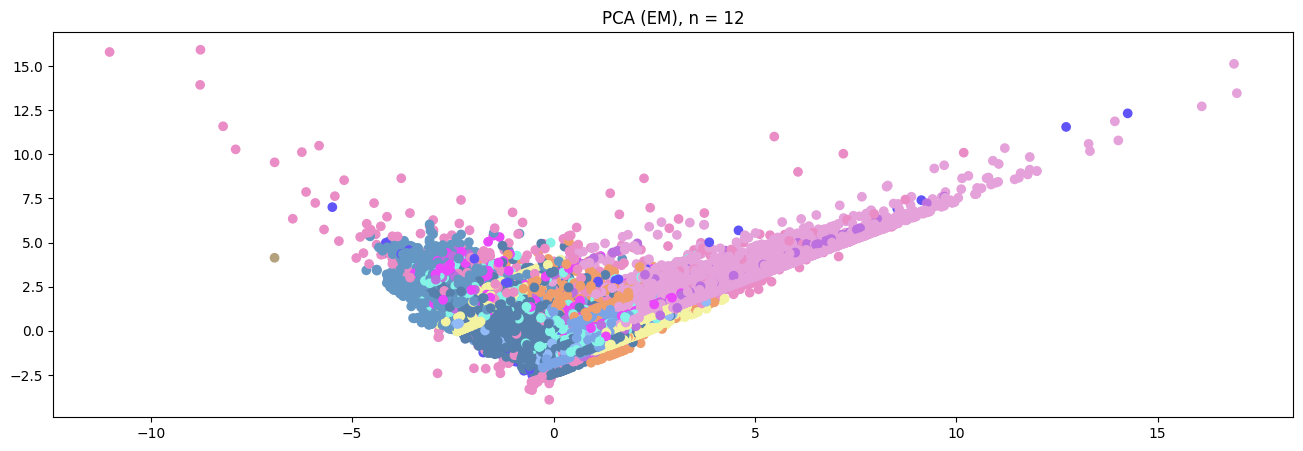

In [ ]:
n = 13
gm = GaussianMixture(n_components=n)
labels = gm.fit_predict(X)
df_labels = pd.DataFrame()
df_labels['Labels'] = labels

colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 12')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [ ]:
df = df_labels
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 11)]
df_13 = df[(df['Labels'] == 12)]

data_sel12={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11, 11: df_12, 12: df_13}

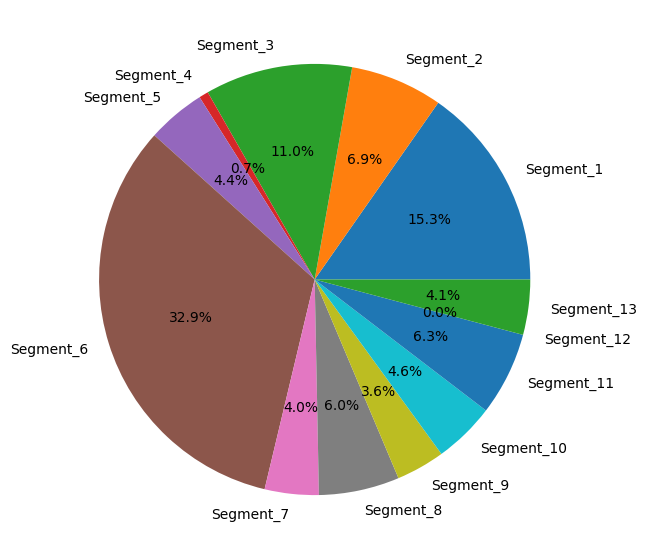

In [ ]:
fig = plt.figure(figsize =(10, 7))
data = [len(i) for i in data_sel12.values()]
labels = [('Segment_' + str(i)) for i in range(1, 14)]
plt.pie(data, labels=labels, autopct='%1.1f%%')

plt.show()

In [ ]:
df['Labels'] = df_labels['Labels']

In [ ]:
#сводная таблица по всем клиентам с номерами кластеров в соответствии с сегментацией
df.to_excel('labels_for_13_klasters.xlsx')

In [ ]:
df1 = pd.read_excel('/content/labels_for_13_klasters.xlsx', index_col=0) # таблица с кластерами

In [ ]:
df_ind = df1

In [ ]:
df = pd.read_excel('/content/TN_сводная.xlsx', index_col=0) # сводная таблица

In [ ]:
df['Klaster'] = None

In [ ]:
df = df.reset_index()
df = df.drop(columns=['id'])

df = df.rename(columns={'index': 'id'})


In [ ]:
keys = ['id']
df = df.assign(Klaster=df[keys].join(df_ind.drop_duplicates(keys).set_index(keys).Labels, on=keys).Labels)


In [ ]:
df_sum = df.groupby('Klaster').sum()

In [ ]:
# доли
product_cols = [
    'детское питание', 'женские штучки', 'игрушки', 'канцтовары, книги, диски', 'косметика/гигиена',
    'крупногабаритный товар', 'обувь', 'подгузники', 'сопутствующие товары',
    'текстиль, трикотаж', 'техника и товары для дома', 'товары для животных', 'товары для кормления'
]

df_sum[product_cols] = df_sum[product_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
payment_cols = ['Безналичная', 'Наличная']
df_sum[payment_cols] = df_sum[payment_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
region_cols = [
    'CENTRAL', 'FAR EAST', 'NORTH', 'PRIVOLZIE',
    'SIBERIA', 'SOUTHERN', 'URAL', 'Неизвестный Регион'
]
df_sum[region_cols] = df_sum[region_cols].div(df_sum['К-во выкупл.тов.'], axis=0) * 100


In [ ]:
df_sum['Процент_скид_от_общ_суммы_покупки'] = df_sum['Сумма Покупки'] / df_sum['Сумма Покупки'] * 100  # если скидка будет — поменяешь


In [ ]:
df_sum['Средний_чек'] = df_sum['Сумма Покупки'] / df_sum['КОЛ-ВО ЧЕКОВ']


In [ ]:
df_sum['Сред_к-во_тов_в_чеке'] = df_sum['К-во выкупл.тов.'] / df_sum['КОЛ-ВО ЧЕКОВ']


In [ ]:
df_sum.to_excel('13_klasters_for_svod.xlsx')

In [ ]:
df_sum = df_sum.drop(columns=['level_0'])

In [ ]:
df_sum = df_sum.drop(columns=['id'])

In [ ]:
df_sum = df_sum.round(2)


In [ ]:
df_sum

,детское питание,женские штучки,игрушки,"канцтовары, книги, диски",косметика/гигиена,крупногабаритный товар,обувь,подгузники,сопутствующие товары,"текстиль, трикотаж",техника и товары для дома,товары для животных,товары для кормления,К-во выкупл.тов.,CENTRAL,FAR EAST,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Неизвестный Регион,Безналичная,Наличная,Сумма Покупки,КОЛ-ВО ЧЕКОВ,Средний_чек,Процент_скид_от_общ_суммы_покупки,Сред_к-во_тов_в_чеке
Klaster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,37.28,0.09,12.80,3.29,6.87,4.06,2.73,8.40,0.15,10.84,0.00,2.00,3.97,143292,59.89,1.44,4.77,9.95,3.82,4.76,2.84,12.54,55.62,44.38,89766516.8,26156,3431.97,100.0,5.48
1.0,39.01,0.13,12.34,3.20,6.61,3.99,2.72,8.01,0.15,10.83,0.00,1.66,3.96,67237,59.58,1.39,5.40,8.99,3.70,3.77,2.56,14.61,54.07,45.93,40740511.1,11930,3414.96,100.0,5.64
2.0,39.27,0.11,12.94,3.60,6.05,4.00,2.76,8.22,0.14,10.65,0.01,1.20,3.69,107028,60.20,1.62,5.24,8.65,5.02,3.28,3.29,12.69,55.21,44.79,65908764.7,19026,3464.14,100.0,5.63
3.0,41.49,0.15,12.34,2.16,6.09,3.78,2.73,8.69,0.11,10.73,0.00,1.88,3.05,7173,63.68,0.15,3.19,9.16,3.54,3.23,1.30,15.74,58.44,41.56,4227990.8,1201,3520.39,100.0,5.97
4.0,37.91,0.13,12.86,3.12,6.87,3.76,2.66,8.49,0.11,9.82,0.02,3.16,3.77,42276,61.37,1.15,4.08,9.20,5.49,2.76,4.13,11.83,55.11,44.89,24828356.4,7392,3358.81,100.0,5.72
5.0,38.30,0.12,12.74,3.41,6.64,3.95,2.99,8.08,0.16,10.78,0.01,1.84,3.57,332320,61.54,0.78,5.36,8.71,3.70,2.88,3.29,13.73,54.75,45.25,202746541.3,58938,3440.00,100.0,5.64
6.0,37.17,0.24,13.06,3.69,7.36,3.80,2.76,8.34,0.10,10.41,0.01,1.71,3.84,40658,65.49,0.66,8.34,4.57,2.06,1.60,3.51,13.78,52.74,47.26,24181835.4,6901,3504.11,100.0,5.89
7.0,41.35,0.07,11.91,2.75,6.46,3.85,2.50,7.98,0.12,10.06,0.01,1.72,3.90,60397,62.35,0.78,5.11,7.02,4.34,3.75,3.82,12.83,52.61,47.39,36250012.3,10538,3439.93,100.0,5.73
8.0,41.06,0.09,13.09,2.68,6.51,4.04,2.11,8.23,0.16,10.47,0.00,1.73,3.19,38258,63.74,0.92,3.70,8.23,4.42,3.49,2.96,12.53,52.49,47.51,22326414.7,6534,3416.96,100.0,5.86


In [ ]:
numeric_cols = df_sum.select_dtypes(include=['int64', 'float64']).columns

styled_df = df_sum.style \
    .set_properties(**{
        'border': '1px solid #dddddd',
        'padding': '5px'
    }) \
    .background_gradient(
        cmap='Blues',
        subset=numeric_cols
    )

styled_df

,детское питание,женские штучки,игрушки,"канцтовары, книги, диски",косметика/гигиена,крупногабаритный товар,обувь,подгузники,сопутствующие товары,"текстиль, трикотаж",техника и товары для дома,товары для животных,товары для кормления,К-во выкупл.тов.,CENTRAL,FAR EAST,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Неизвестный Регион,Безналичная,Наличная,Сумма Покупки,КОЛ-ВО ЧЕКОВ,Средний_чек,Процент_скид_от_общ_суммы_покупки,Сред_к-во_тов_в_чеке
Klaster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,37.280000,0.090000,12.800000,3.290000,6.870000,4.060000,2.730000,8.400000,0.150000,10.840000,0.000000,2.000000,3.970000,143292,59.890000,1.440000,4.770000,9.950000,3.820000,4.760000,2.840000,12.540000,55.620000,44.380000,89766516.800000,26156,3431.970000,100.000000,5.480000
1.000000,39.010000,0.130000,12.340000,3.200000,6.610000,3.990000,2.720000,8.010000,0.150000,10.830000,0.000000,1.660000,3.960000,67237,59.580000,1.390000,5.400000,8.990000,3.700000,3.770000,2.560000,14.610000,54.070000,45.930000,40740511.100000,11930,3414.960000,100.000000,5.640000
2.000000,39.270000,0.110000,12.940000,3.600000,6.050000,4.000000,2.760000,8.220000,0.140000,10.650000,0.010000,1.200000,3.690000,107028,60.200000,1.620000,5.240000,8.650000,5.020000,3.280000,3.290000,12.690000,55.210000,44.790000,65908764.700000,19026,3464.140000,100.000000,5.630000
3.000000,41.490000,0.150000,12.340000,2.160000,6.090000,3.780000,2.730000,8.690000,0.110000,10.730000,0.000000,1.880000,3.050000,7173,63.680000,0.150000,3.190000,9.160000,3.540000,3.230000,1.300000,15.740000,58.440000,41.560000,4227990.800000,1201,3520.390000,100.000000,5.970000
4.000000,37.910000,0.130000,12.860000,3.120000,6.870000,3.760000,2.660000,8.490000,0.110000,9.820000,0.020000,3.160000,3.770000,42276,61.370000,1.150000,4.080000,9.200000,5.490000,2.760000,4.130000,11.830000,55.110000,44.890000,24828356.400000,7392,3358.810000,100.000000,5.720000
5.000000,38.300000,0.120000,12.740000,3.410000,6.640000,3.950000,2.990000,8.080000,0.160000,10.780000,0.010000,1.840000,3.570000,332320,61.540000,0.780000,5.360000,8.710000,3.700000,2.880000,3.290000,13.730000,54.750000,45.250000,202746541.300000,58938,3440.000000,100.000000,5.640000
6.000000,37.170000,0.240000,13.060000,3.690000,7.360000,3.800000,2.760000,8.340000,0.100000,10.410000,0.010000,1.710000,3.840000,40658,65.490000,0.660000,8.340000,4.570000,2.060000,1.600000,3.510000,13.780000,52.740000,47.260000,24181835.400000,6901,3504.110000,100.000000,5.890000
7.000000,41.350000,0.070000,11.910000,2.750000,6.460000,3.850000,2.500000,7.980000,0.120000,10.060000,0.010000,1.720000,3.900000,60397,62.350000,0.780000,5.110000,7.020000,4.340000,3.750000,3.820000,12.830000,52.610000,47.390000,36250012.300000,10538,3439.930000,100.000000,5.730000
8.000000,41.060000,0.090000,13.090000,2.680000,6.510000,4.040000,2.110000,8.230000,0.160000,10.470000,0.000000,1.730000,3.190000,38258,63.740000,0.920000,3.700000,8.230000,4.420000,3.490000,2.960000,12.530000,52.490000,47.510000,22326414.700000,6534,3416.960000,100.000000,5.860000
